In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

# Utils

In [2]:
def analyze_distribution(data, feature, label):
    # Vẽ Histogram và KDE
    plt.figure(figsize=(12, 6))
    sns.histplot(data[feature], kde=True, label=f'Label {label}', bins=30)
    plt.title(f'Distribution of Feature {feature} for Label {label}')
    plt.legend()
    plt.show()

    # Vẽ QQ-plot cho phân phối chuẩn
    plt.figure(figsize=(12, 6))
    stats.probplot(data[feature], dist="norm", plot=plt)
    plt.title(f'QQ-Plot of Feature {feature} for Label {label} with Normal Distribution')
    plt.show()

    # Kiểm định phân phối chuẩn (Normal)
    mean, std = data[feature].mean(), data[feature].std()
    stat, p_value = stats.kstest(data[feature], 'norm', args=(mean, std))
    print(f'KS-test for Normal distribution (Feature {feature}, Label {label}): Statistic = {stat}, p-value = {p_value}')
    if p_value > 0.05:
        print(f"Data seems to follow a Normal distribution (Feature {feature}, Label {label}).")
        print(f'Estimated parameters: Mean = {mean}, Std = {std}')
    else:
        print(f"Data does not follow a Normal distribution (Feature {feature}, Label {label}).")

    # Vẽ QQ-plot cho phân phối t-Student
    plt.figure(figsize=(12, 6))
    stats.probplot(data[feature], dist="t", sparams=(len(data)-1,), plot=plt)
    plt.title(f'QQ-Plot of Feature {feature} for Label {label} with t-Student Distribution')
    plt.show()

    # Kiểm định phân phối t-Student
    shape, loc, scale = stats.t.fit(data[feature])
    stat, p_value = stats.kstest(data[feature], 't', args=(shape, loc, scale))
    print(f'KS-test for t-Student distribution (Feature {feature}, Label {label}): Statistic = {stat}, p-value = {p_value}')
    if p_value > 0.05:
        print(f"Data seems to follow a t-Student distribution (Feature {feature}, Label {label}).")
        print(f'Estimated parameters: Shape = {shape}, Location = {loc}, Scale = {scale}')
    else:
        print(f"Data does not follow a t-Student distribution (Feature {feature}, Label {label}).")

    # # Vẽ QQ-plot cho phân phối Exponential
    # plt.figure(figsize=(12, 6))
    # stats.probplot(data[feature], dist="expon", sparams=(data[feature].min(), data[feature].mean()-data[feature].min()), plot=plt)
    # plt.title(f'QQ-Plot of Feature {feature} for Label {label} with Exponential Distribution')
    # plt.show()

    # # Kiểm định phân phối Exponential
    # loc, scale = stats.expon.fit(data[feature])
    # stat, p_value = stats.kstest(data[feature], 'expon', args=(loc, scale))
    # print(f'KS-test for Exponential distribution (Feature {feature}, Label {label}): Statistic = {stat}, p-value = {p_value}')
    # if p_value > 0.05:
    #     print(f"Data seems to follow an Exponential distribution (Feature {feature}, Label {label}).")
    #     print(f'Estimated parameters: Location = {loc}, Scale = {scale}')
    # else:
    #     print(f"Data does not follow an Exponential distribution (Feature {feature}, Label {label}).")

    # # Vẽ QQ-plot cho phân phối Poisson
    # plt.figure(figsize=(12, 6))
    # stats.probplot(data[feature], dist="poisson", sparams=(np.mean(data[feature]),), plot=plt)
    # plt.title(f'QQ-Plot of Feature {feature} for Label {label} with Poisson Distribution')
    # plt.show()

    # # Kiểm định phân phối Poisson
    # lambda_ = np.mean(data[feature])
    # poisson_stat, poisson_p_value = stats.kstest(data[feature], 'poisson', args=(lambda_,))
    # print(f'KS-test for Poisson distribution (Feature {feature}, Label {label}): Statistic = {poisson_stat}, p-value = {poisson_p_value}')
    # if poisson_p_value > 0.05:
    #     print(f"Data seems to follow a Poisson distribution (Feature {feature}, Label {label}).")
    #     print(f'Estimated parameter: Lambda = {lambda_}')
    # else:
    #     print(f"Data does not follow a Poisson distribution (Feature {feature}, Label {label}).")

    # # Vẽ QQ-plot cho phân phối Gamma
    # plt.figure(figsize=(12, 6))
    # shape, loc, scale = stats.gamma.fit(data[feature])
    # stats.probplot(data[feature], dist="gamma", sparams=(shape, loc, scale), plot=plt)
    # plt.title(f'QQ-Plot of Feature {feature} for Label {label} with Gamma Distribution')
    # plt.show()

    # # Kiểm định phân phối Gamma
    # shape, loc, scale = stats.gamma.fit(data[feature])
    # gamma_stat, gamma_p_value = stats.kstest(data[feature], 'gamma', args=(shape, loc, scale))
    # print(f'KS-test for Gamma distribution (Feature {feature}, Label {label}): Statistic = {gamma_stat}, p-value = {gamma_p_value}')
    # if gamma_p_value > 0.05:
    #     print(f"Data seems to follow a Gamma distribution (Feature {feature}, Label {label}).")
    #     print(f'Estimated parameters: Shape = {shape}, Location = {loc}, Scale = {scale}')
    # else:
    #     print(f"Data does not follow a Gamma distribution (Feature {feature}, Label {label}).")

    # # Vẽ QQ-plot cho phân phối Beta
    # plt.figure(figsize=(12, 6))
    # a, b, loc, scale = stats.beta.fit(data[feature])
    # stats.probplot(data[feature], dist="beta", sparams=(a, b, loc, scale), plot=plt)
    # plt.title(f'QQ-Plot of Feature {feature} for Label {label} with Beta Distribution')
    # plt.show()

    # # Kiểm định phân phối Beta
    # a, b, loc, scale = stats.beta.fit(data[feature])
    # beta_stat, beta_p_value = stats.kstest(data[feature], 'beta', args=(a, b, loc, scale))
    # print(f'KS-test for Beta distribution (Feature {feature}, Label {label}): Statistic = {beta_stat}, p-value = {beta_p_value}')
    # if beta_p_value > 0.05:
    #     print(f"Data seems to follow a Beta distribution (Feature {feature}, Label {label}).")
    #     print(f'Estimated parameters: a = {a}, b = {b}, Location = {loc}, Scale = {scale}')
    # else:
    #     print(f"Data does not follow a Beta distribution (Feature {feature}, Label {label}).")

    # # Vẽ QQ-plot cho phân phối Log-Normal
    # plt.figure(figsize=(12, 6))
    # shape, loc, scale = stats.lognorm.fit(data[feature], floc=0)
    # stats.probplot(data[feature], dist="lognorm", sparams=(shape, loc, scale), plot=plt)
    # plt.title(f'QQ-Plot of Feature {feature} for Label {label} with Log-Normal Distribution')
    # plt.show()

    # # Kiểm định phân phối Log-Normal
    # shape, loc, scale = stats.lognorm.fit(data[feature], floc=0)
    # lognorm_stat, lognorm_p_value = stats.kstest(data[feature], 'lognorm', args=(shape, loc, scale))
    # print(f'KS-test for Log-Normal distribution (Feature {feature}, Label {label}): Statistic = {lognorm_stat}, p-value = {lognorm_p_value}')
    # if lognorm_p_value > 0.05:
    #     print(f"Data seems to follow a Log-Normal distribution (Feature {feature}, Label {label}).")
    #     print(f'Estimated parameters: Shape = {shape}, Location = {loc}, Scale = {scale}')
    # else:
    #     print(f"Data does not follow a Log-Normal distribution (Feature {feature}, Label {label}).")

    # # Vẽ QQ-plot cho phân phối Weibull
    # plt.figure(figsize=(12, 6))
    # shape, loc, scale = stats.weibull_min.fit(data[feature])
    # stats.probplot(data[feature], dist="weibull_min", sparams=(shape, loc, scale), plot=plt)
    # plt.title(f'QQ-Plot of Feature {feature} for Label {label} with Weibull Distribution')
    # plt.show()

    # # Kiểm định phân phối Weibull
    # shape, loc, scale = stats.weibull_min.fit(data[feature])
    # weibull_stat, weibull_p_value = stats.kstest(data[feature], 'weibull_min', args=(shape, loc, scale))
    # print(f'KS-test for Weibull distribution (Feature {feature}, Label {label}): Statistic = {weibull_stat}, p-value = {weibull_p_value}')
    # if weibull_p_value > 0.05:
    #     print(f"Data seems to follow a Weibull distribution (Feature {feature}, Label {label}).")
    #     print(f'Estimated parameters: Shape = {shape}, Location = {loc}, Scale = {scale}')
    # else:
    #     print(f"Data does not follow a Weibull distribution (Feature {feature}, Label {label}).")

# Data

In [3]:
import os

os.chdir('/home/haipn/Clone/Research_ThyroidFNA_ClassAI/phase2_280824/data/processed')

In [4]:
!pwd

/home/haipn/Clone/Research_ThyroidFNA_ClassAI/phase2_280824/data/processed


In [5]:
# Đọc dữ liệu từ các file CSV
train_df = pd.read_csv('train_features.csv')
valid_df = pd.read_csv('valid_features.csv')
test_df = pd.read_csv('test_features.csv')

# Danh sách các đặc trưng và nhãn
features = ['dim_0', 'dim_1', 'dim_2']
labels = [0, 1, 2]

# Main

Analyzing dataset: Train


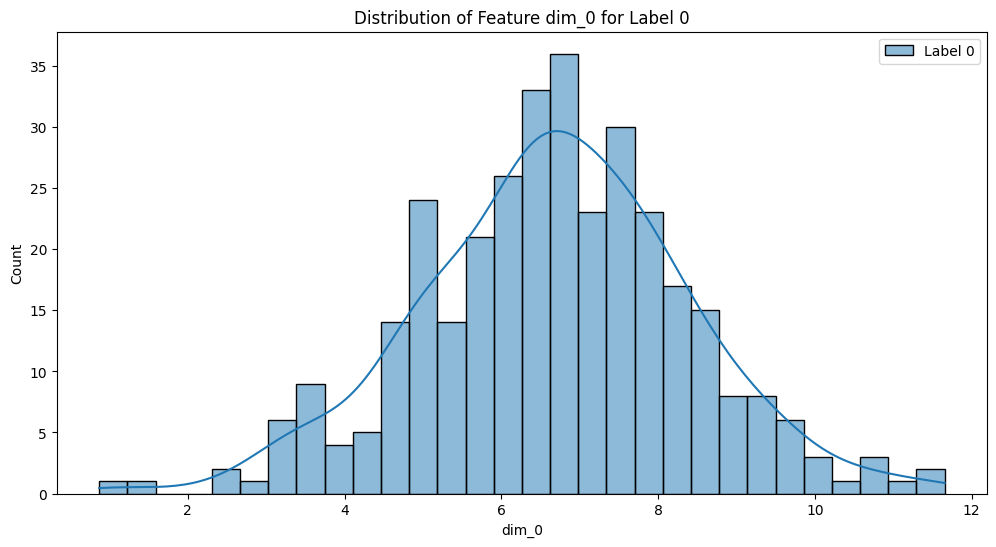

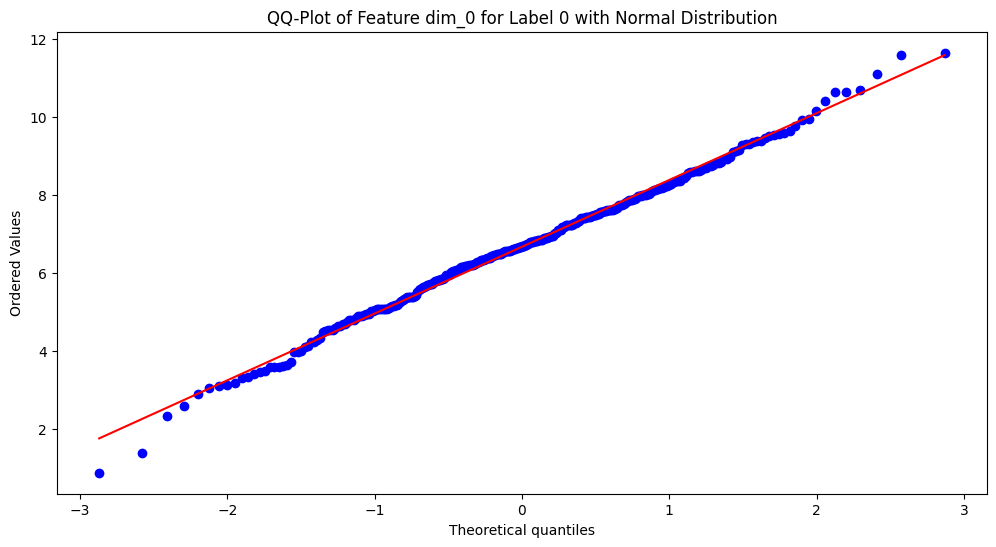

KS-test for Normal distribution (Feature dim_0, Label 0): Statistic = 0.040042477669672616, p-value = 0.6373726490918339
Data seems to follow a Normal distribution (Feature dim_0, Label 0).
Estimated parameters: Mean = 6.6730952667907015, Std = 1.7099229776136318


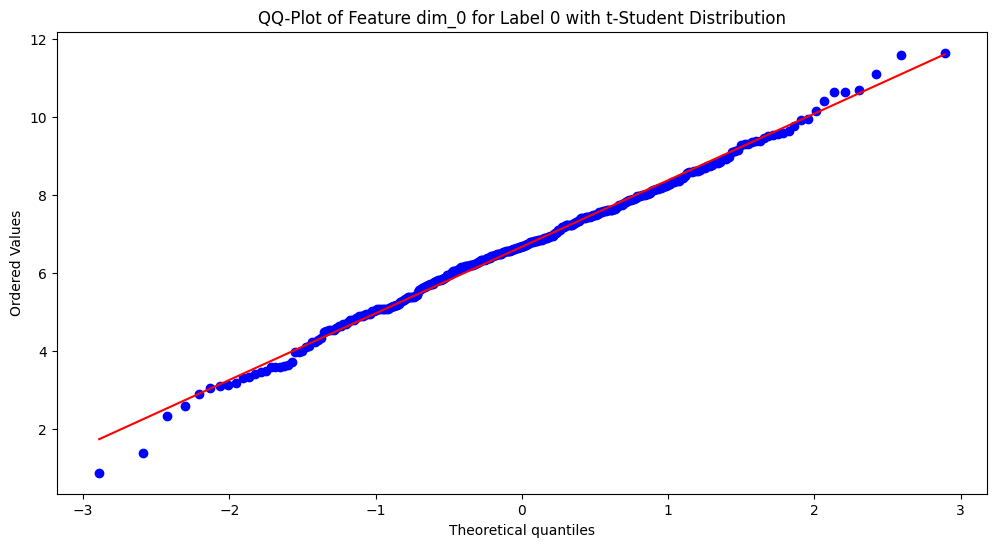

KS-test for t-Student distribution (Feature dim_0, Label 0): Statistic = 0.030657664203170176, p-value = 0.8995688032414052
Data seems to follow a t-Student distribution (Feature dim_0, Label 0).
Estimated parameters: Shape = 14.09546348144989, Location = 6.682333440864278, Scale = 1.583714636860711


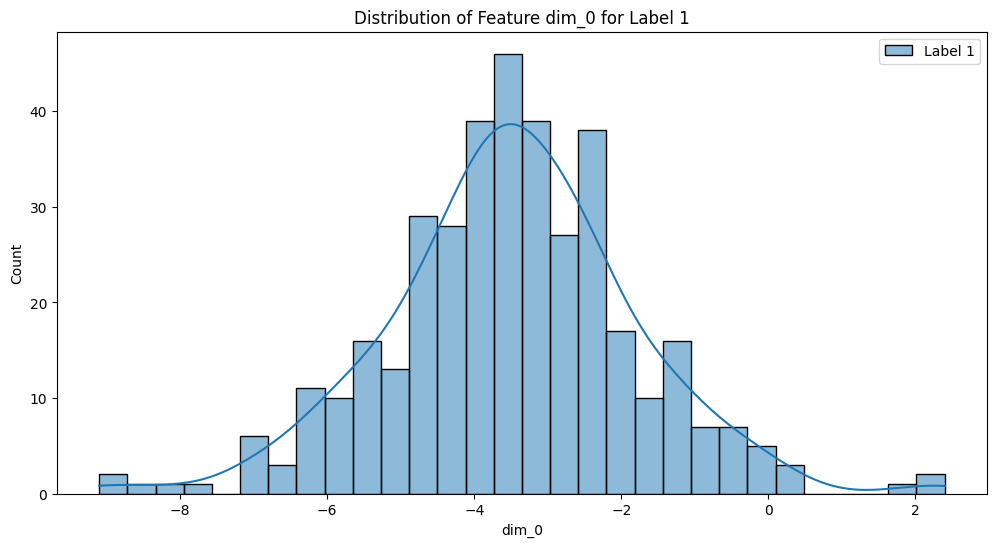

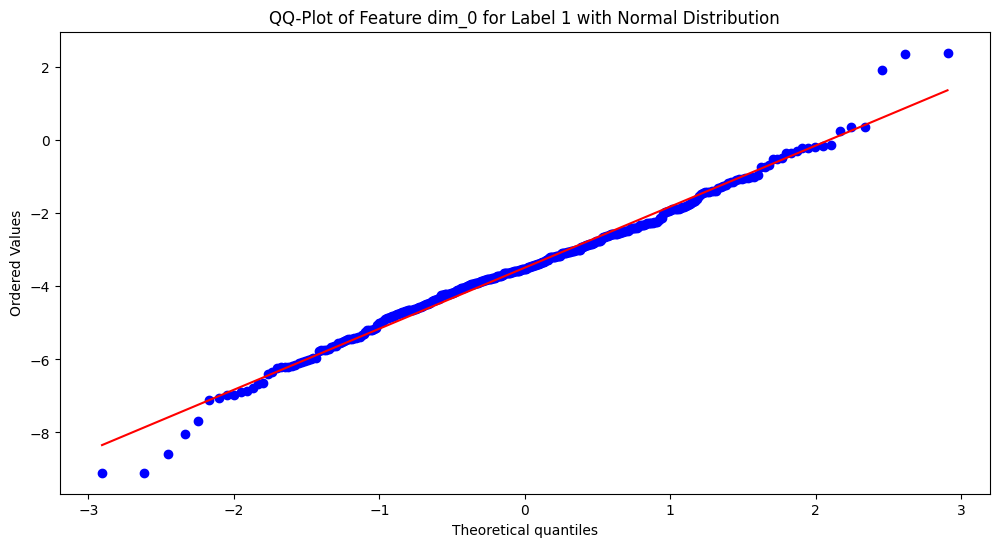

KS-test for Normal distribution (Feature dim_0, Label 1): Statistic = 0.047096066333404685, p-value = 0.3602864755533288
Data seems to follow a Normal distribution (Feature dim_0, Label 1).
Estimated parameters: Mean = -3.4882447721150815, Std = 1.6740043543332306


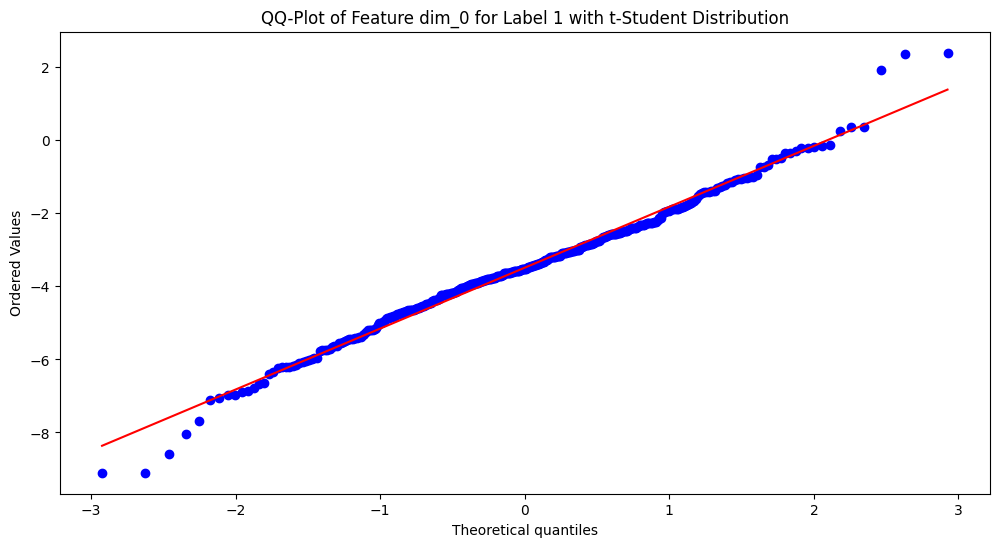

KS-test for t-Student distribution (Feature dim_0, Label 1): Statistic = 0.024246225821293765, p-value = 0.9755120735841096
Data seems to follow a t-Student distribution (Feature dim_0, Label 1).
Estimated parameters: Shape = 6.887969994494039, Location = -3.4826628121412195, Scale = 1.4173412983965794


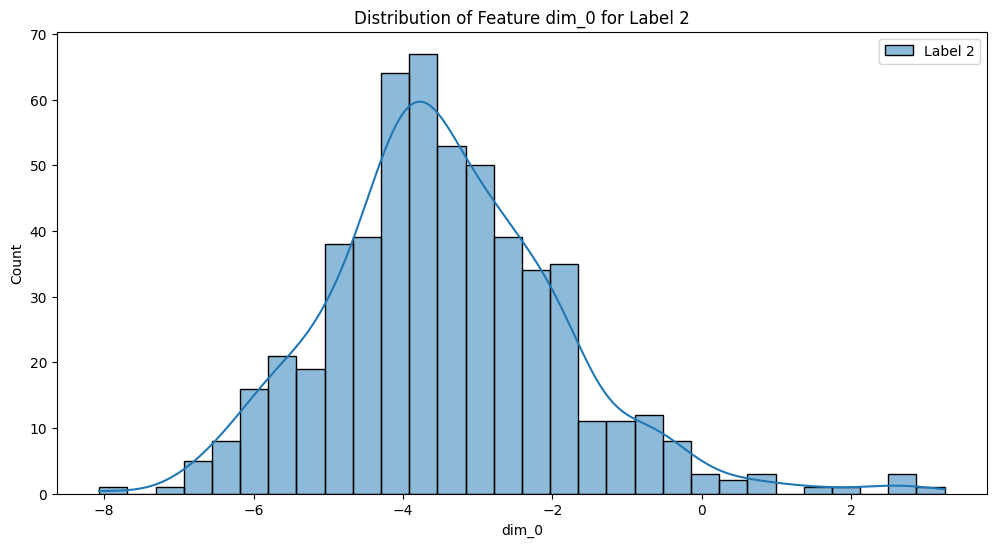

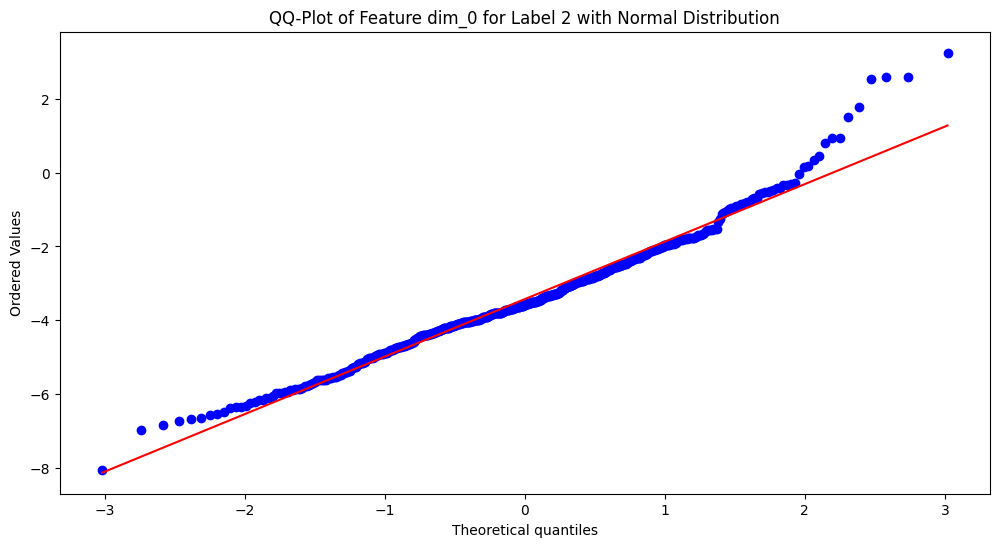

KS-test for Normal distribution (Feature dim_0, Label 2): Statistic = 0.05564988238010782, p-value = 0.06542883258181875
Data seems to follow a Normal distribution (Feature dim_0, Label 2).
Estimated parameters: Mean = -3.4285463575587602, Std = 1.5730853500789983


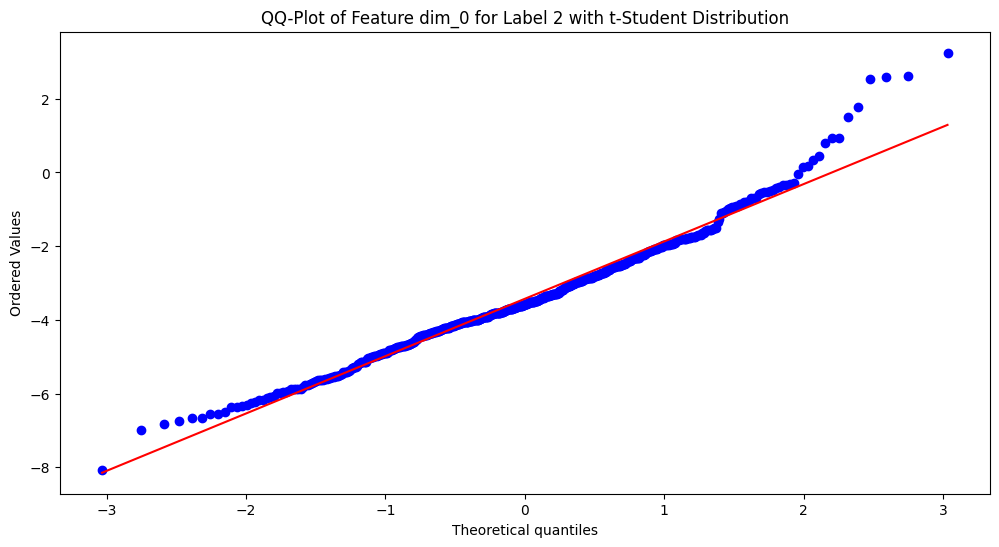

KS-test for t-Student distribution (Feature dim_0, Label 2): Statistic = 0.03221903723820441, p-value = 0.6106052178867643
Data seems to follow a t-Student distribution (Feature dim_0, Label 2).
Estimated parameters: Shape = 6.741591270675432, Location = -3.49702852240671, Scale = 1.3222121093801271


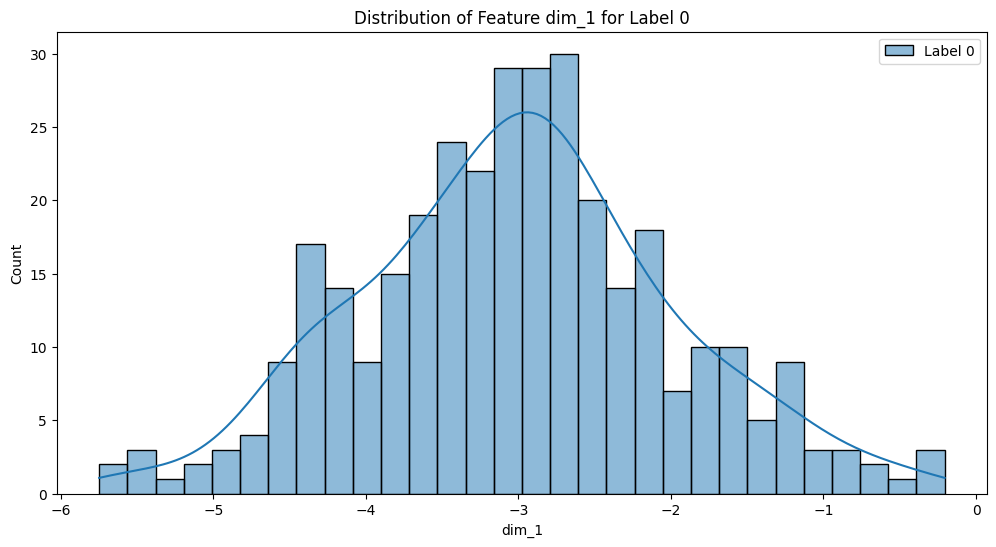

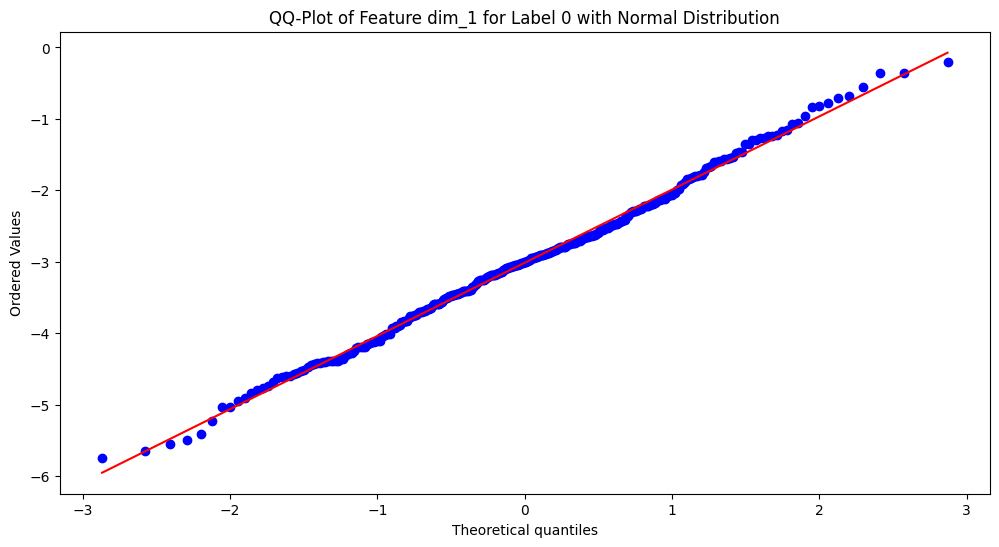

KS-test for Normal distribution (Feature dim_1, Label 0): Statistic = 0.03727908406410496, p-value = 0.7225536360879004
Data seems to follow a Normal distribution (Feature dim_1, Label 0).
Estimated parameters: Mean = -3.0121014564787245, Std = 1.0196592716038102


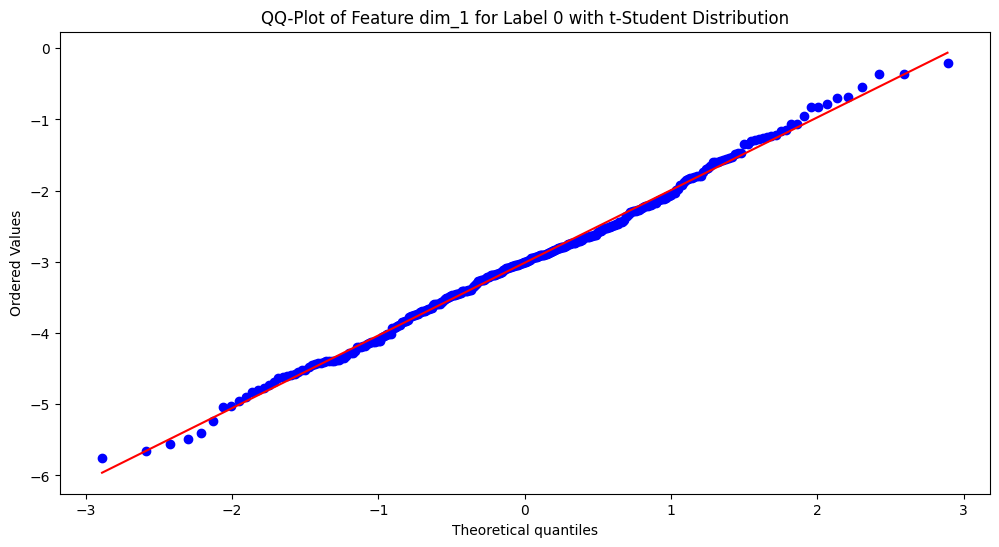

KS-test for t-Student distribution (Feature dim_1, Label 0): Statistic = 0.037043221460074216, p-value = 0.7297091081381815
Data seems to follow a t-Student distribution (Feature dim_1, Label 0).
Estimated parameters: Shape = 5950.827878483189, Location = -3.012115508088379, Scale = 1.0179750456734245


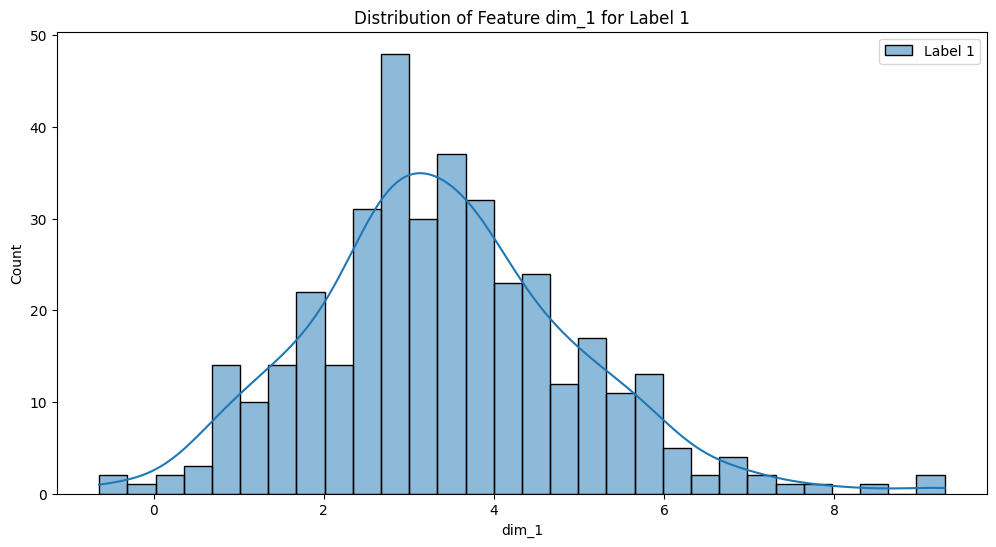

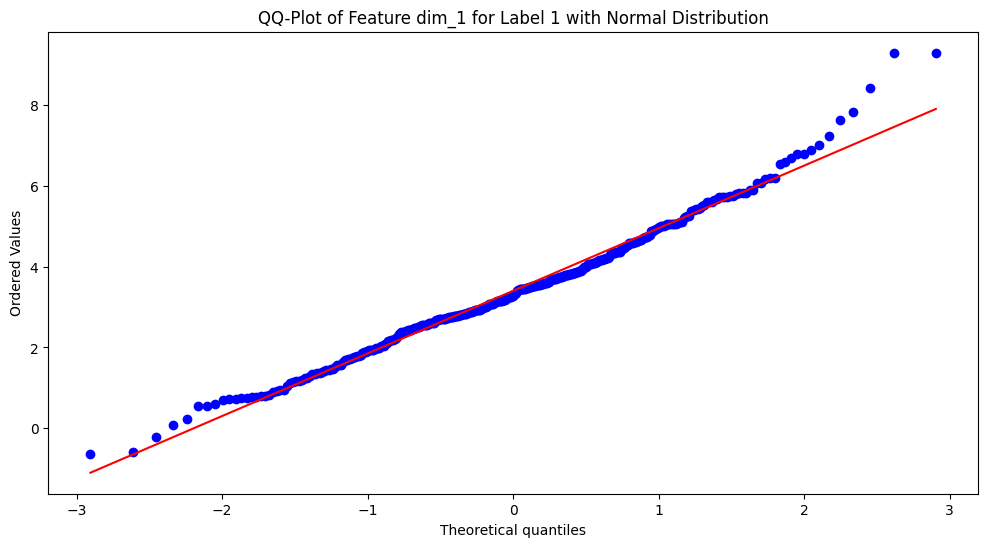

KS-test for Normal distribution (Feature dim_1, Label 1): Statistic = 0.056442767687892914, p-value = 0.1730994174592072
Data seems to follow a Normal distribution (Feature dim_1, Label 1).
Estimated parameters: Mean = 3.400910885285133, Std = 1.554637383396044


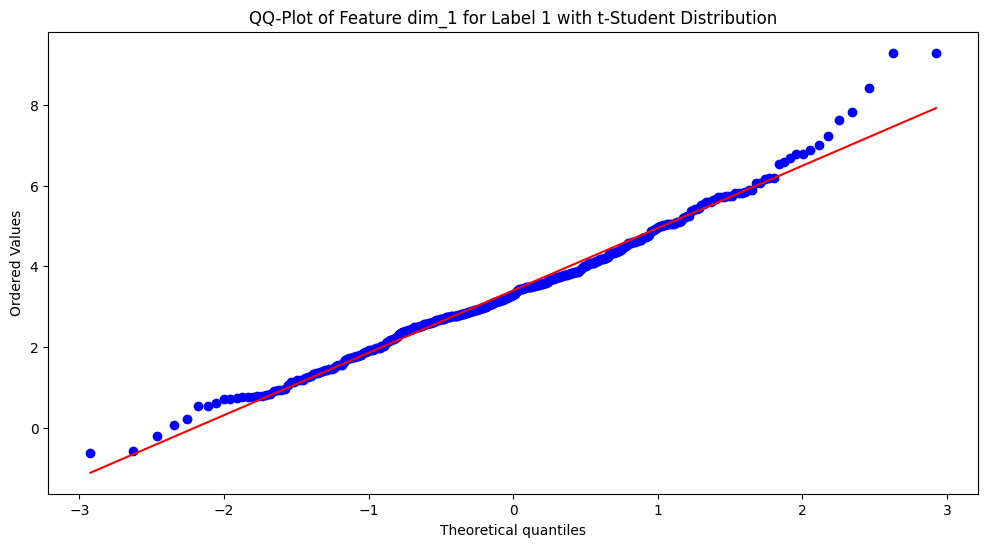

KS-test for t-Student distribution (Feature dim_1, Label 1): Statistic = 0.034463030108380366, p-value = 0.7468607042291524
Data seems to follow a t-Student distribution (Feature dim_1, Label 1).
Estimated parameters: Shape = 9.750214897481058, Location = 3.3563756179056035, Scale = 1.3858427392089983


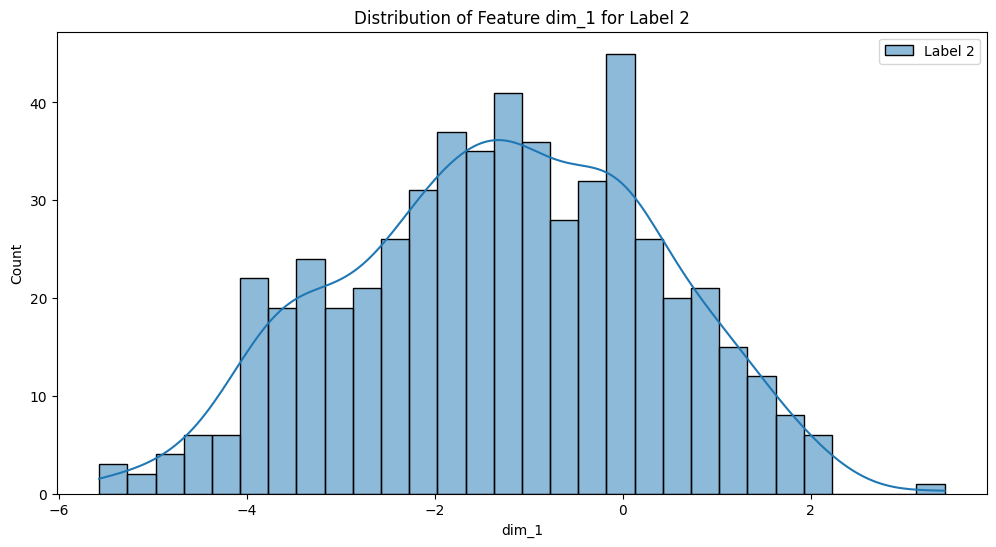

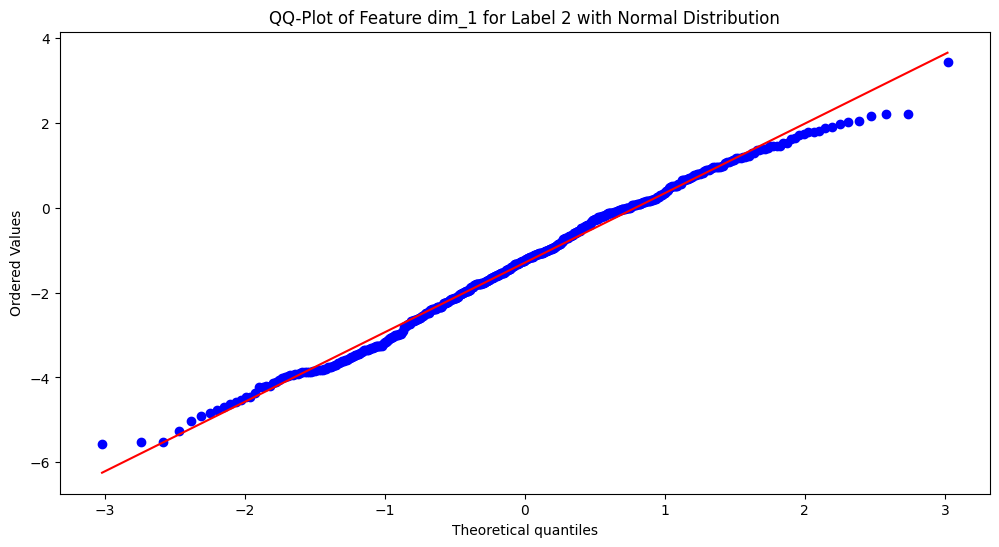

KS-test for Normal distribution (Feature dim_1, Label 2): Statistic = 0.04520581150144809, p-value = 0.20808679195563928
Data seems to follow a Normal distribution (Feature dim_1, Label 2).
Estimated parameters: Mean = -1.2972524945910733, Std = 1.638770436031492


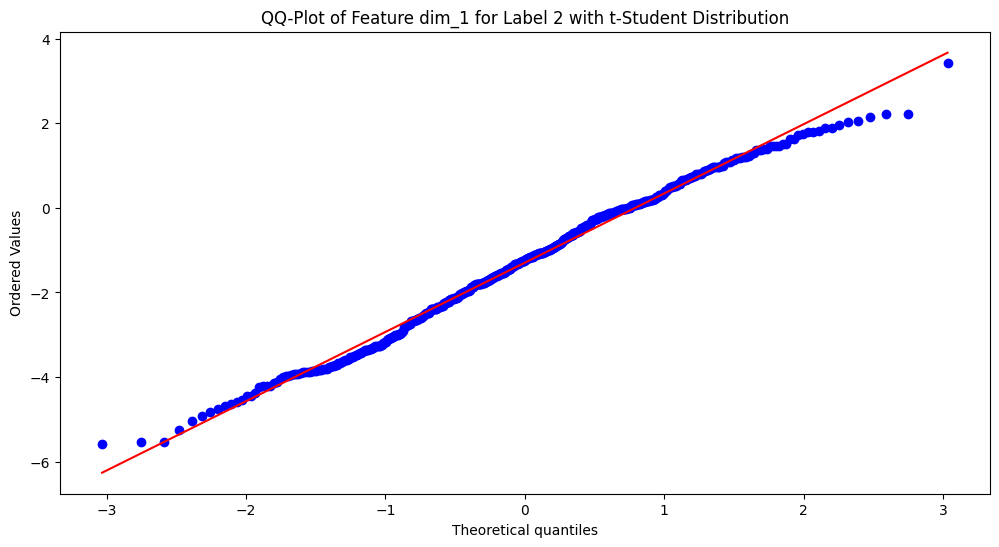

KS-test for t-Student distribution (Feature dim_1, Label 2): Statistic = 0.045391540428530774, p-value = 0.20428334602700504
Data seems to follow a t-Student distribution (Feature dim_1, Label 2).
Estimated parameters: Shape = 205760715754.7307, Location = -1.2972519730476502, Scale = 1.637269440760408


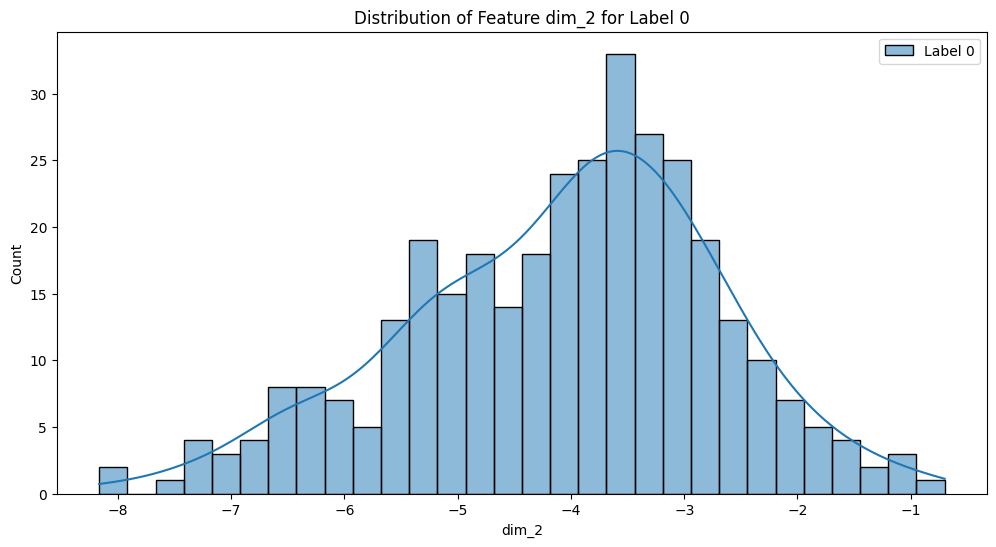

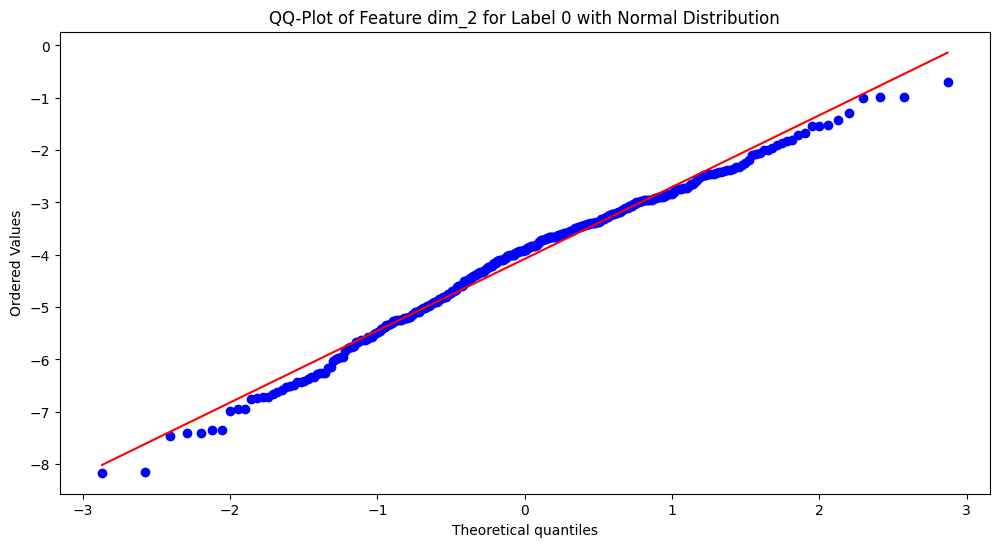

KS-test for Normal distribution (Feature dim_2, Label 0): Statistic = 0.0648440762667804, p-value = 0.1124684731629576
Data seems to follow a Normal distribution (Feature dim_2, Label 0).
Estimated parameters: Mean = -4.077170213004602, Std = 1.3730336842490314


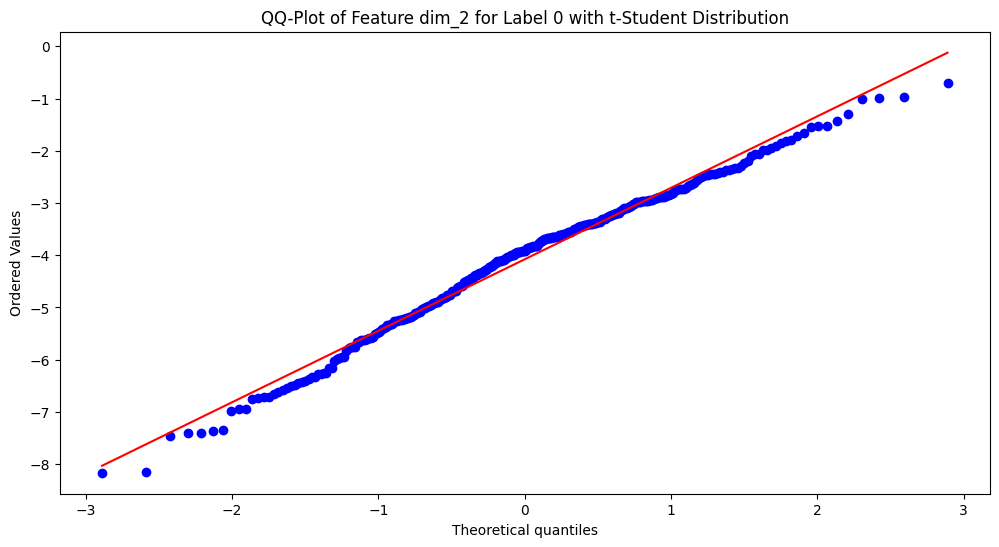

KS-test for t-Student distribution (Feature dim_2, Label 0): Statistic = 0.064802765531351, p-value = 0.11287859428160196
Data seems to follow a t-Student distribution (Feature dim_2, Label 0).
Estimated parameters: Shape = 6031.925947111136, Location = -4.077088001028676, Scale = 1.3707732893436253


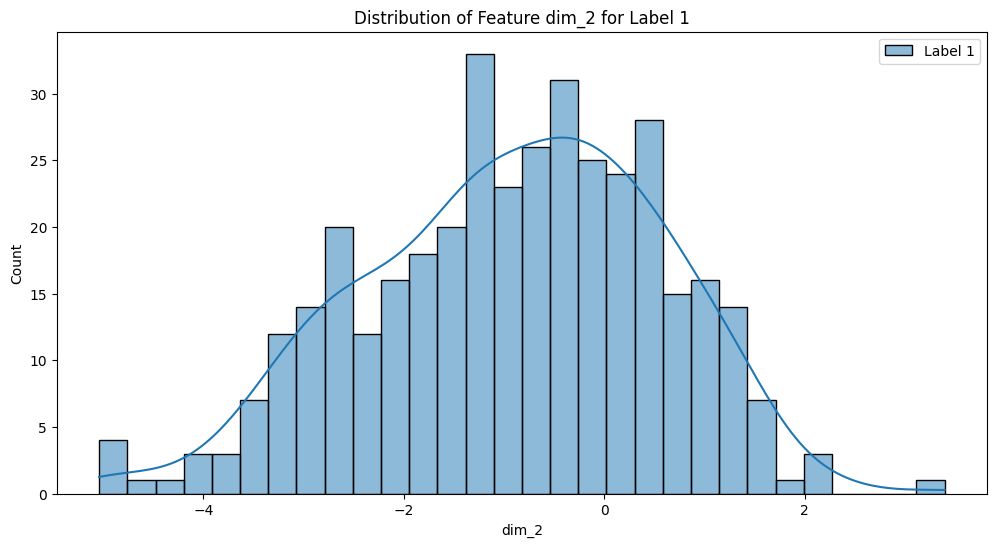

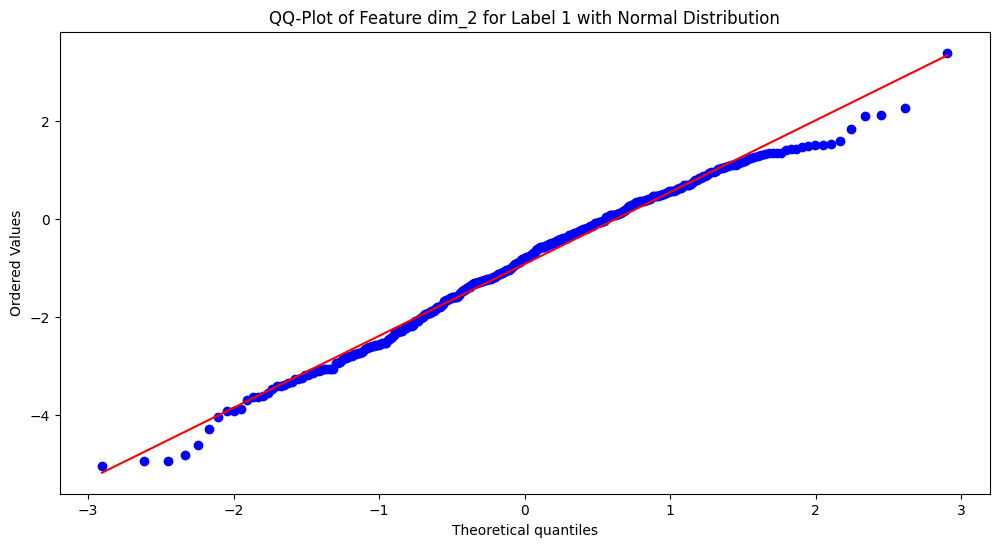

KS-test for Normal distribution (Feature dim_2, Label 1): Statistic = 0.05373941101930846, p-value = 0.21710920823556878
Data seems to follow a Normal distribution (Feature dim_2, Label 1).
Estimated parameters: Mean = -0.9183746229206758, Std = 1.4671256563338897


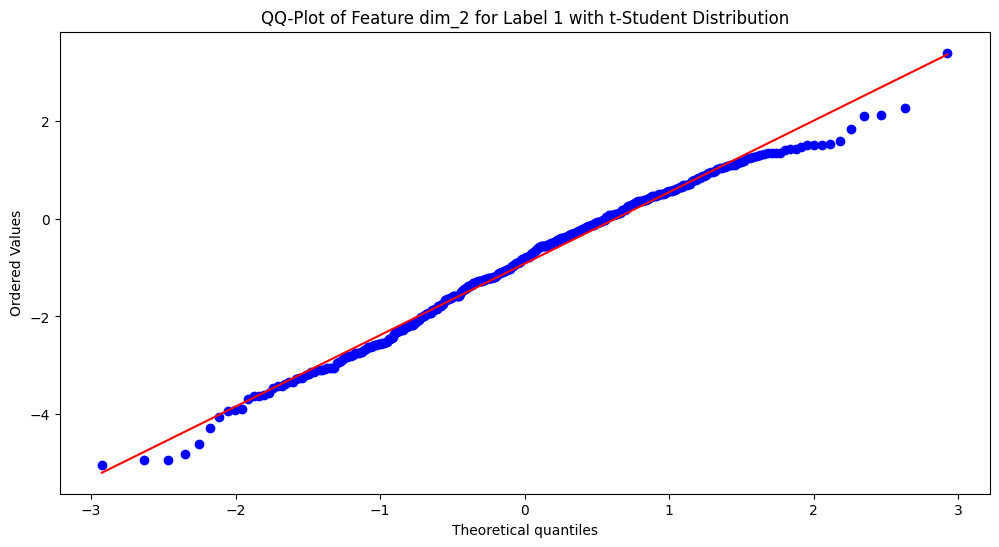

KS-test for t-Student distribution (Feature dim_2, Label 1): Statistic = 0.05386117651121236, p-value = 0.21495842173363422
Data seems to follow a t-Student distribution (Feature dim_2, Label 1).
Estimated parameters: Shape = 32496280275.072308, Location = -0.918375499267911, Scale = 1.4651836200780632


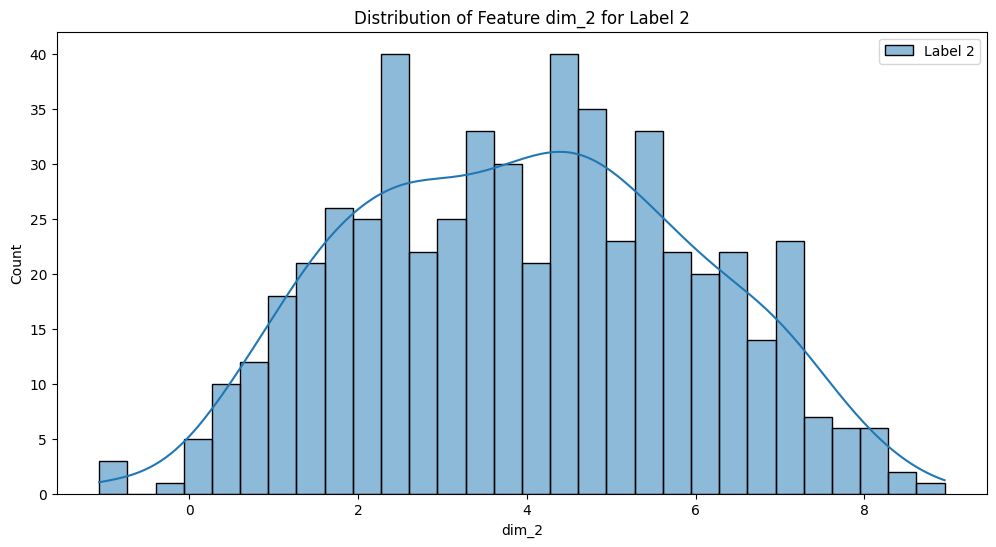

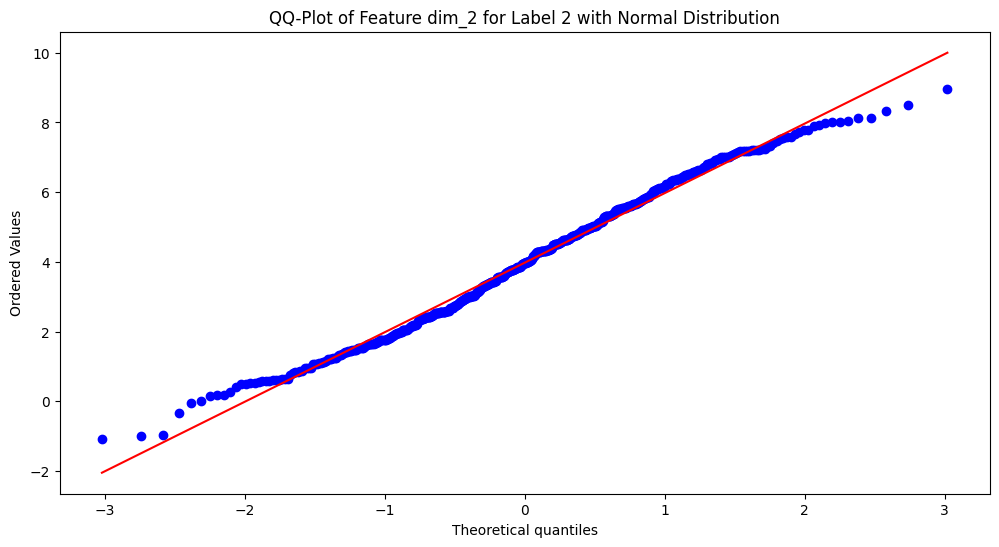

KS-test for Normal distribution (Feature dim_2, Label 2): Statistic = 0.0499777040624142, p-value = 0.1263867167291649
Data seems to follow a Normal distribution (Feature dim_2, Label 2).
Estimated parameters: Mean = 3.9749454849198353, Std = 1.9974776048174143


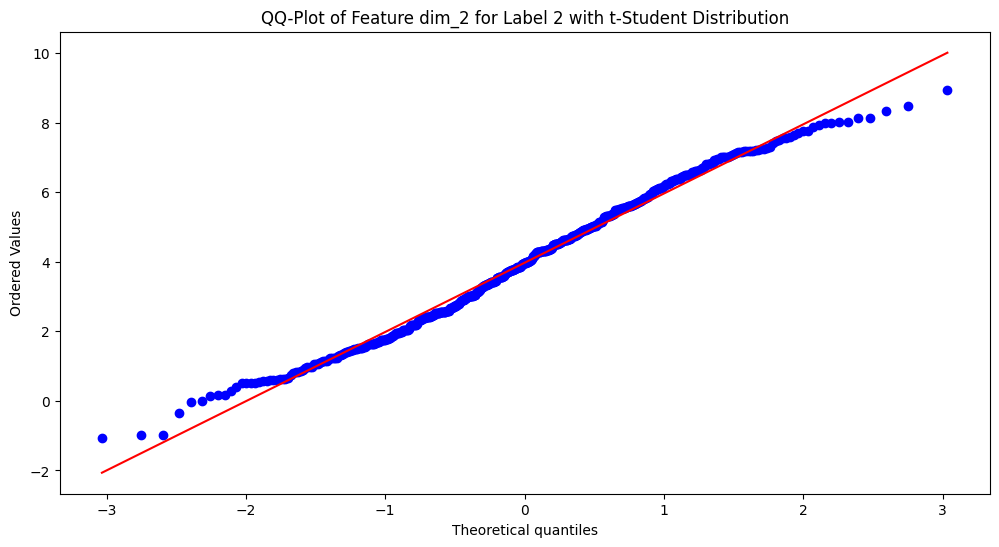

KS-test for t-Student distribution (Feature dim_2, Label 2): Statistic = 0.05017935126148748, p-value = 0.12361324019964848
Data seems to follow a t-Student distribution (Feature dim_2, Label 2).
Estimated parameters: Shape = 777723636.4044157, Location = 3.974960695156831, Scale = 1.995645310828559
Analyzing dataset: Valid


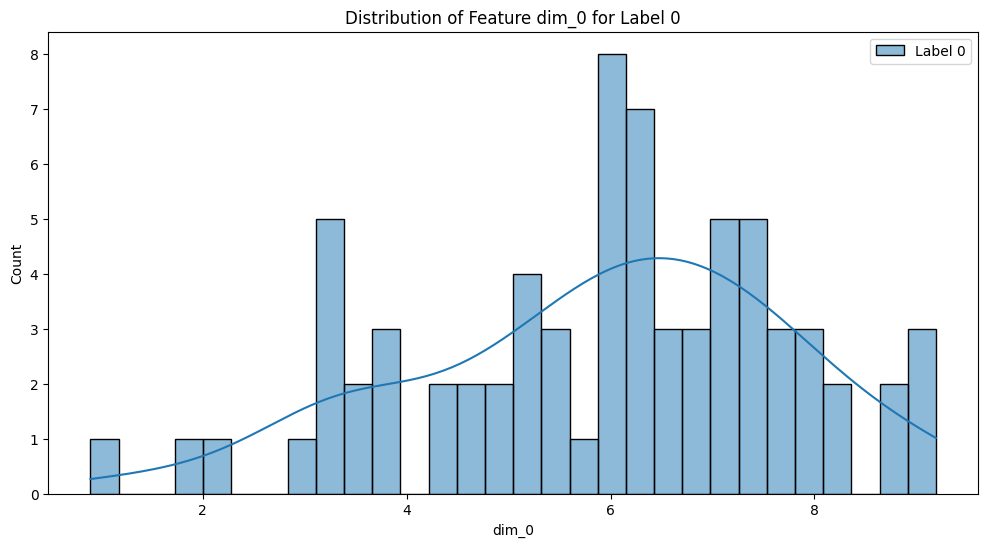

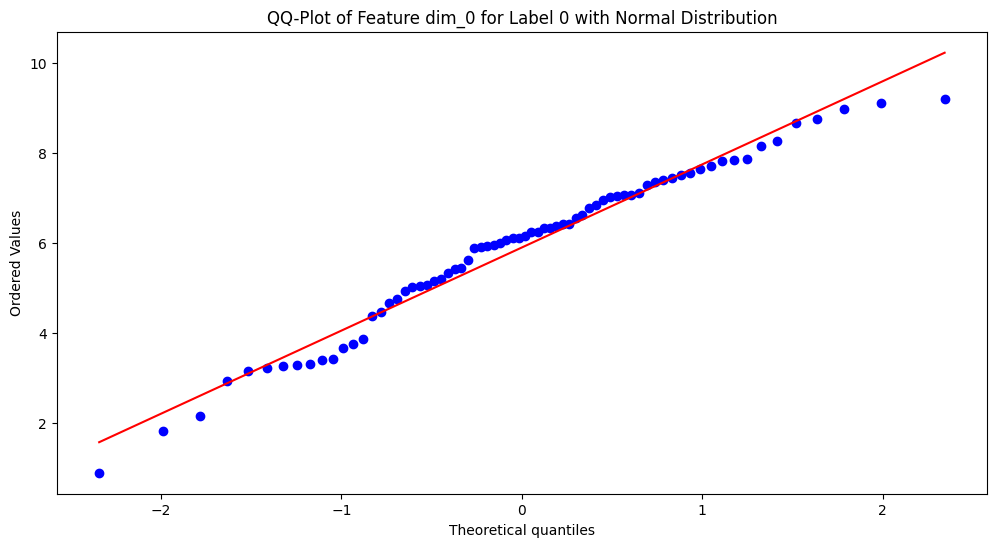

KS-test for Normal distribution (Feature dim_0, Label 0): Statistic = 0.1082386296713711, p-value = 0.34291775907057015
Data seems to follow a Normal distribution (Feature dim_0, Label 0).
Estimated parameters: Mean = 5.901460106174151, Std = 1.8331534638824876


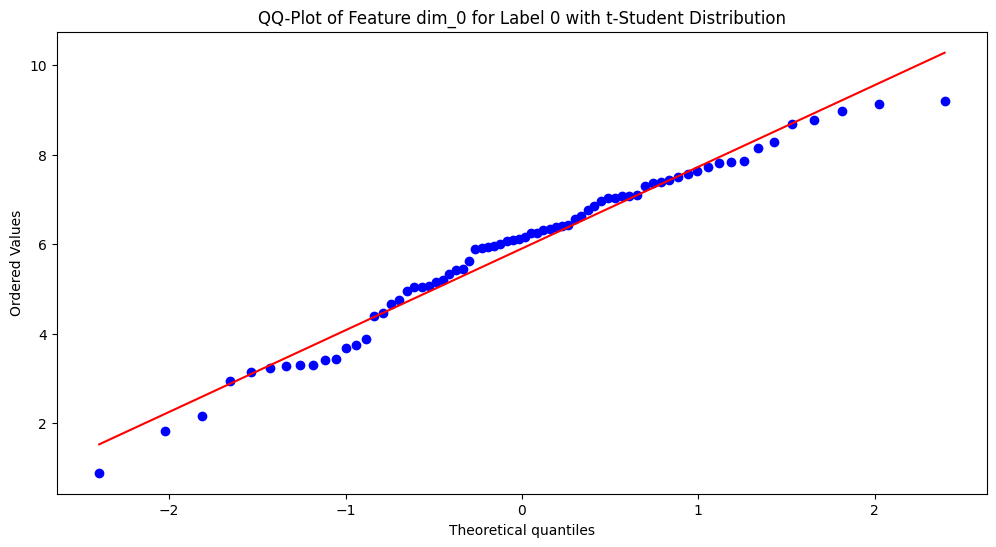

KS-test for t-Student distribution (Feature dim_0, Label 0): Statistic = 0.10821789129821696, p-value = 0.3431413556923713
Data seems to follow a t-Student distribution (Feature dim_0, Label 0).
Estimated parameters: Shape = 1849360219.1876264, Location = 5.9014627376083215, Scale = 1.8203761770184674


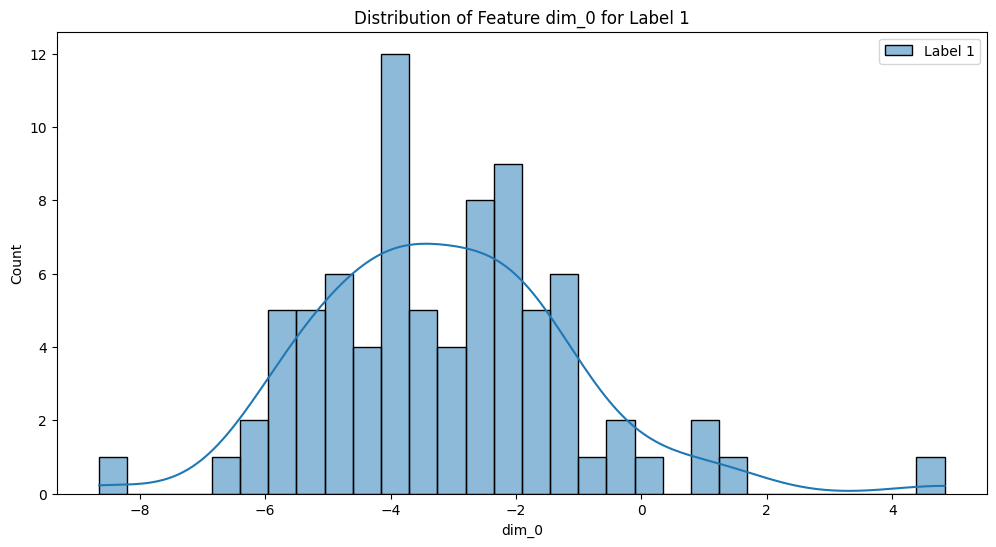

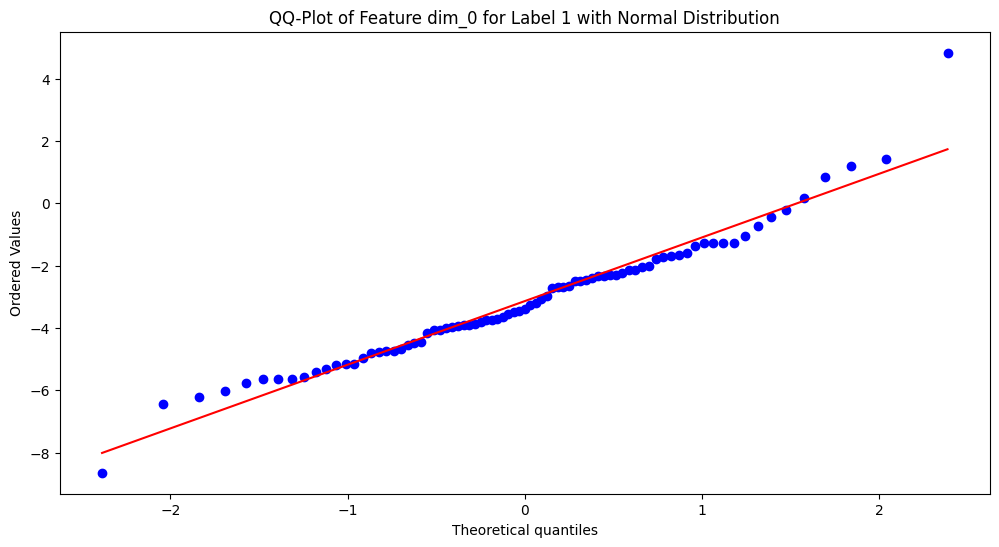

KS-test for Normal distribution (Feature dim_0, Label 1): Statistic = 0.07073411599309065, p-value = 0.7858012448424398
Data seems to follow a Normal distribution (Feature dim_0, Label 1).
Estimated parameters: Mean = -3.1368570243134912, Std = 2.053941346776682


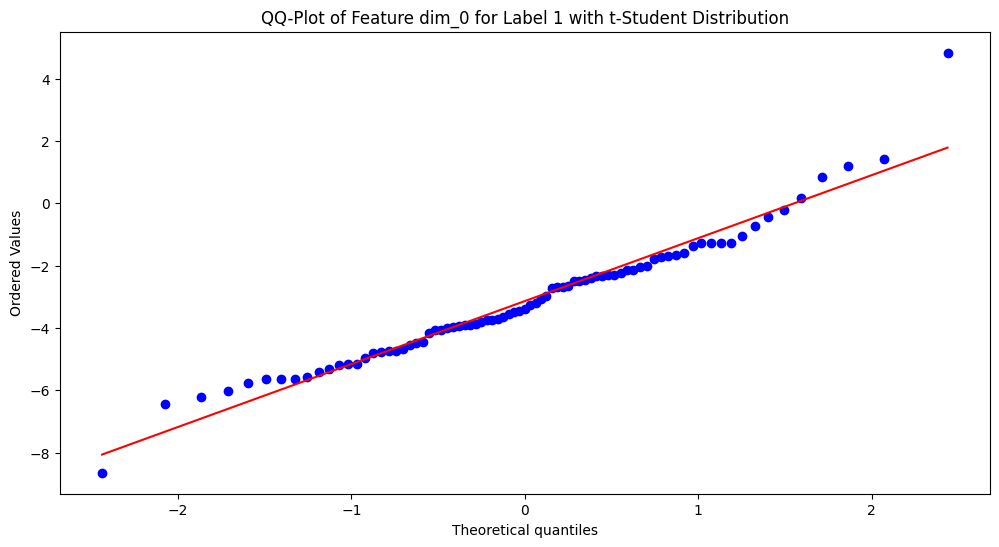

KS-test for t-Student distribution (Feature dim_0, Label 1): Statistic = 0.0577306260747692, p-value = 0.9356047314311468
Data seems to follow a t-Student distribution (Feature dim_0, Label 1).
Estimated parameters: Shape = 6.485429842685162, Location = -3.2332248006121977, Scale = 1.6914875734252144


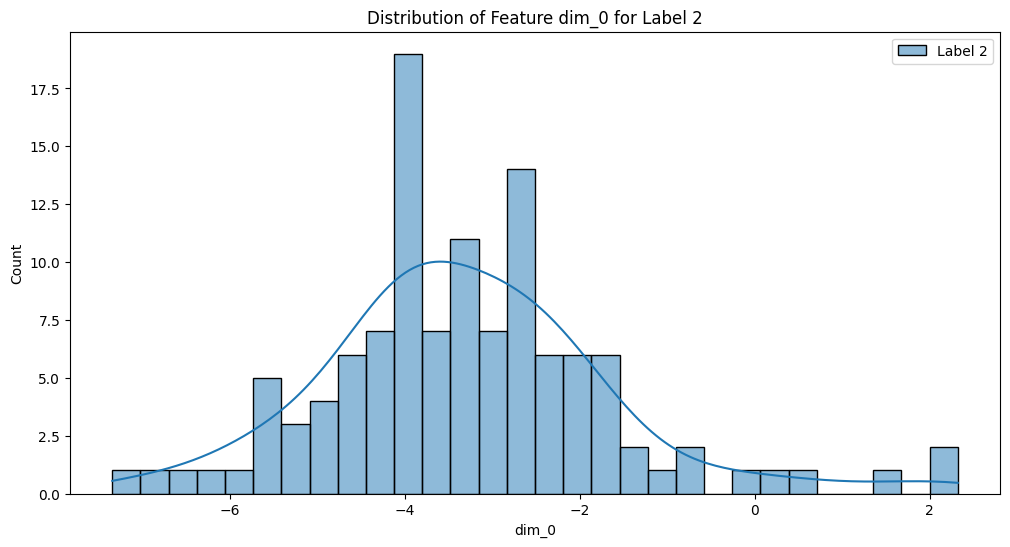

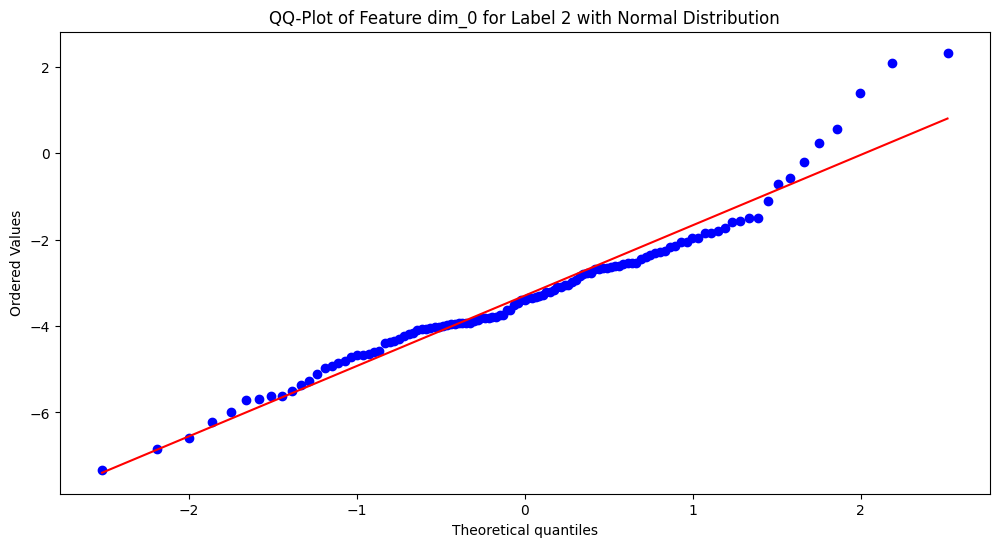

KS-test for Normal distribution (Feature dim_0, Label 2): Statistic = 0.07536065692684668, p-value = 0.4960663622025945
Data seems to follow a Normal distribution (Feature dim_0, Label 2).
Estimated parameters: Mean = -3.2969148199782414, Std = 1.6415364599073772


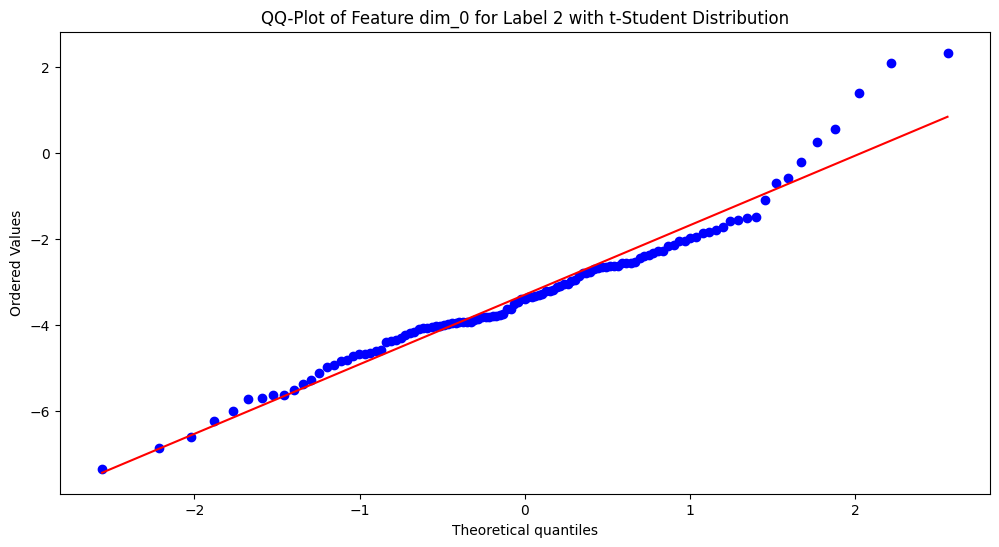

KS-test for t-Student distribution (Feature dim_0, Label 2): Statistic = 0.059097383275878546, p-value = 0.7860129425189303
Data seems to follow a t-Student distribution (Feature dim_0, Label 2).
Estimated parameters: Shape = 4.223346154580167, Location = -3.3912647182193707, Scale = 1.2250927860514396


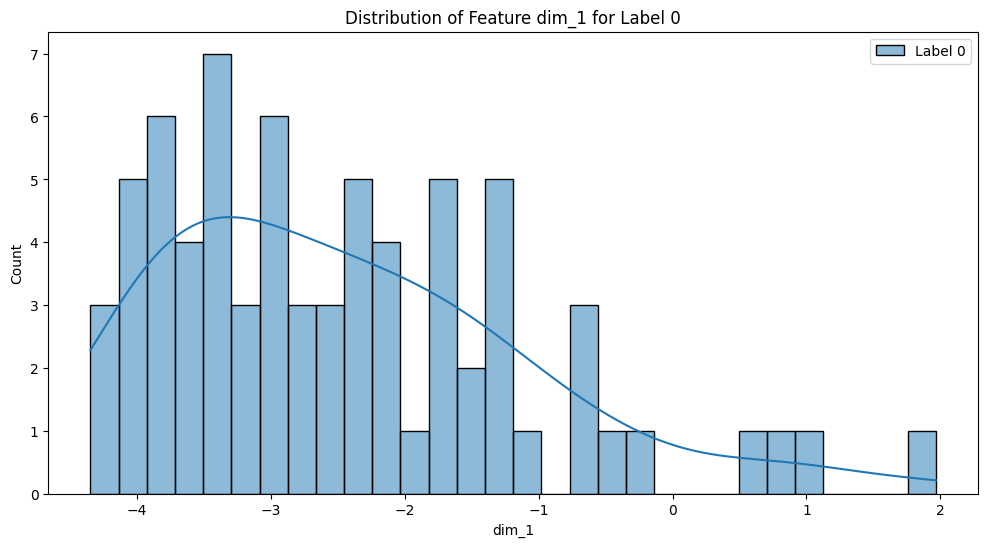

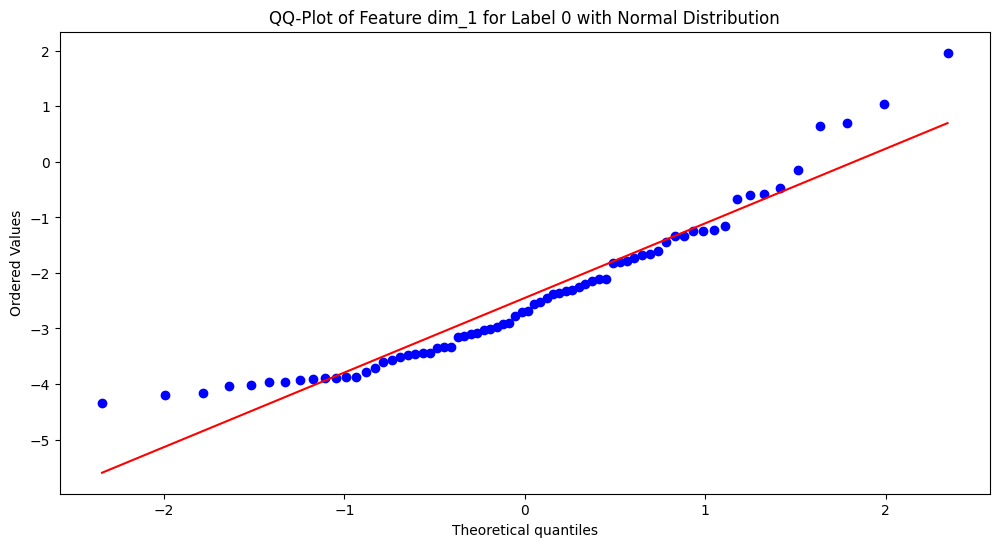

KS-test for Normal distribution (Feature dim_1, Label 0): Statistic = 0.09955412373543537, p-value = 0.444737758821241
Data seems to follow a Normal distribution (Feature dim_1, Label 0).
Estimated parameters: Mean = -2.4497756492346525, Std = 1.3684680686210058


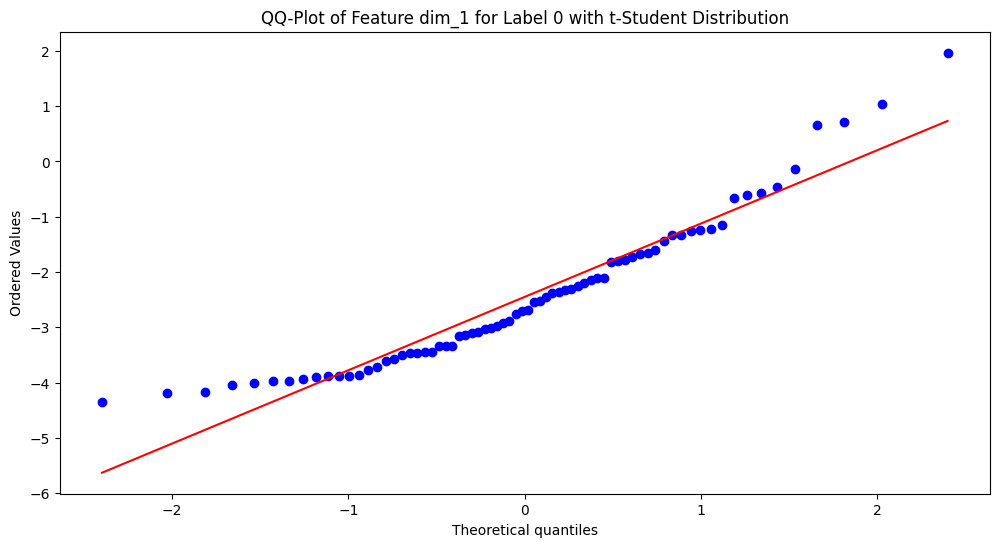

KS-test for t-Student distribution (Feature dim_1, Label 0): Statistic = 0.09012933222361286, p-value = 0.5711964716870412
Data seems to follow a t-Student distribution (Feature dim_1, Label 0).
Estimated parameters: Shape = 9.157332138584566, Location = -2.5582845759493873, Scale = 1.2042946178217853


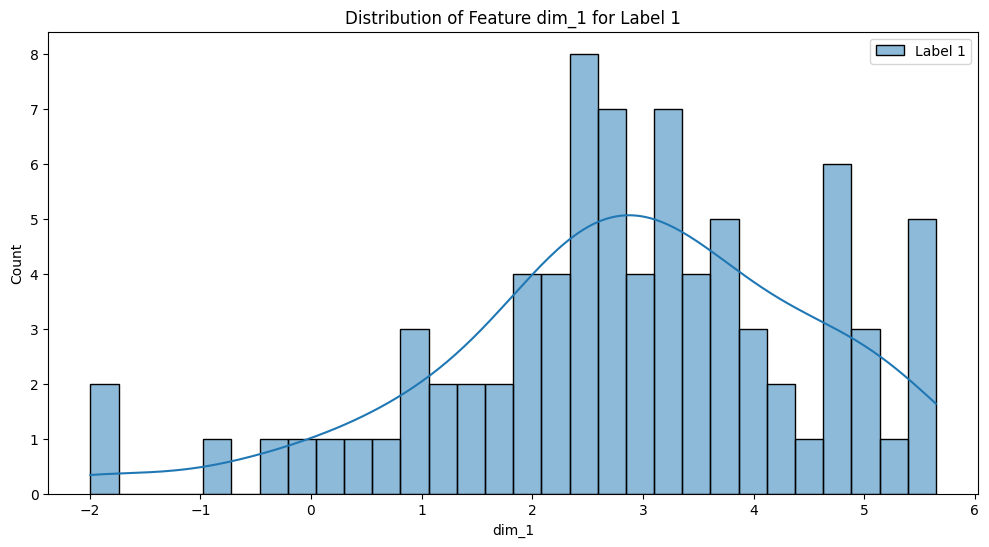

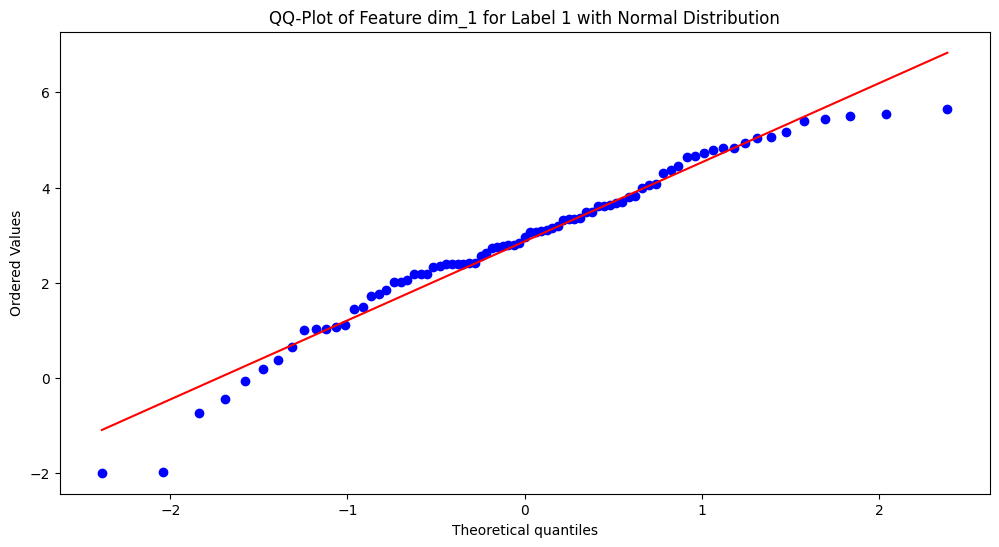

KS-test for Normal distribution (Feature dim_1, Label 1): Statistic = 0.08287027076238829, p-value = 0.6045053868092165
Data seems to follow a Normal distribution (Feature dim_1, Label 1).
Estimated parameters: Mean = 2.869425572362947, Std = 1.6604617301233344


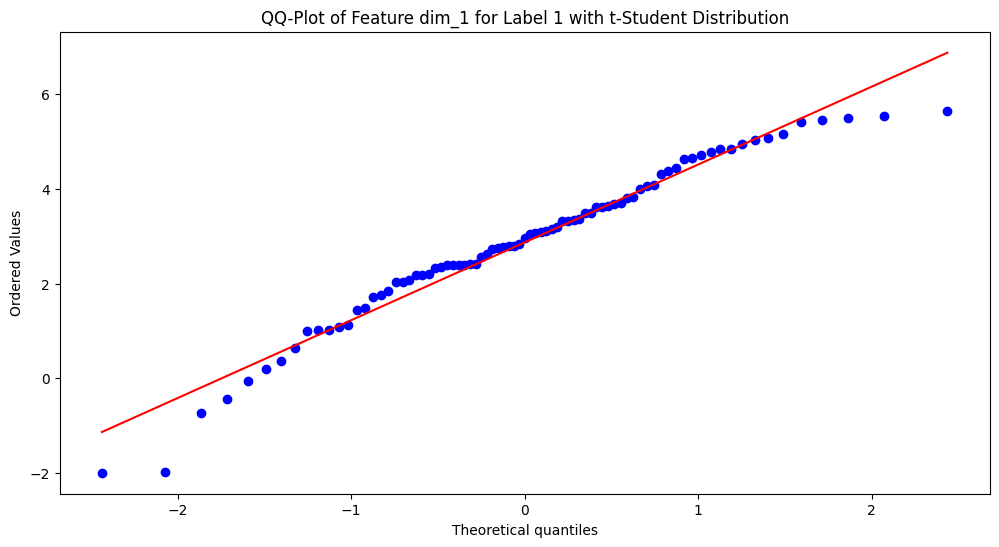

KS-test for t-Student distribution (Feature dim_1, Label 1): Statistic = 0.05427487404271514, p-value = 0.9603683939324354
Data seems to follow a t-Student distribution (Feature dim_1, Label 1).
Estimated parameters: Shape = 10.881846314206019, Location = 2.9378852936504316, Scale = 1.494620210960159


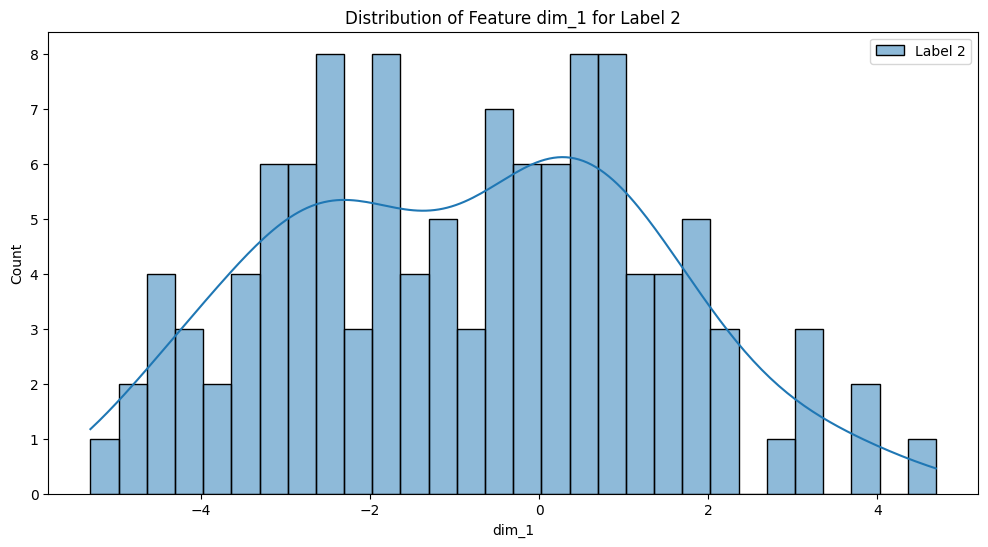

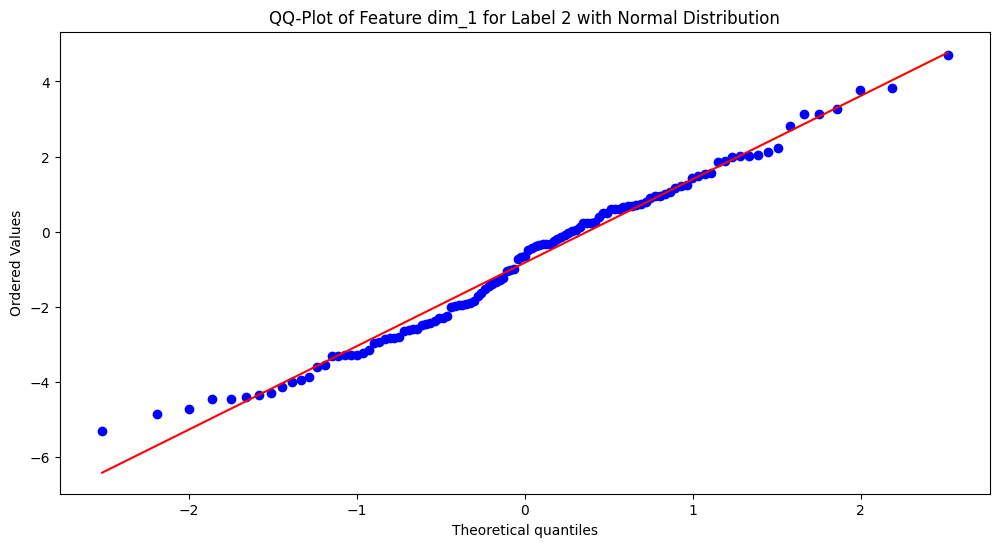

KS-test for Normal distribution (Feature dim_1, Label 2): Statistic = 0.06472145956277509, p-value = 0.686478681684763
Data seems to follow a Normal distribution (Feature dim_1, Label 2).
Estimated parameters: Mean = -0.8275960896235819, Std = 2.205532377103237


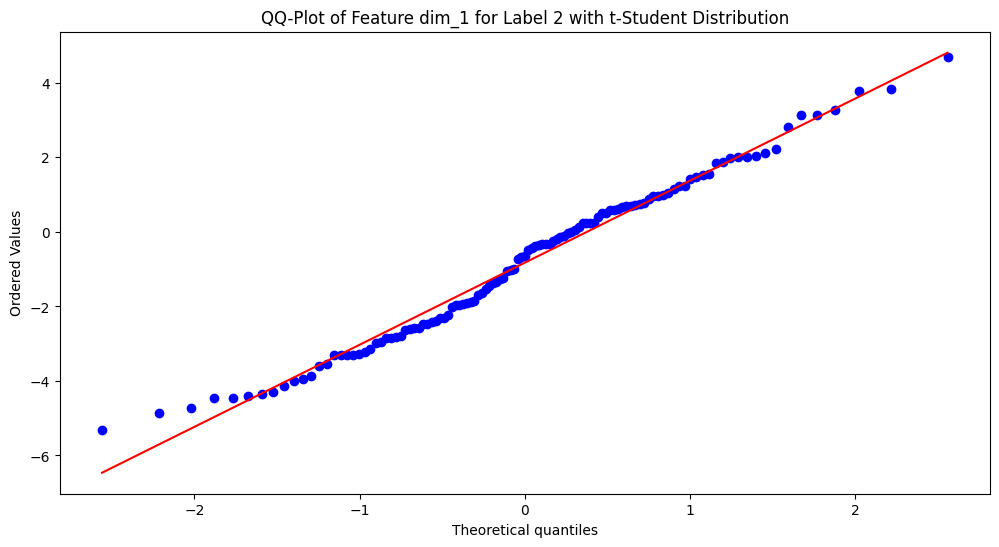

KS-test for t-Student distribution (Feature dim_1, Label 2): Statistic = 0.06563896145795223, p-value = 0.6697520395473657
Data seems to follow a t-Student distribution (Feature dim_1, Label 2).
Estimated parameters: Shape = 28166851689.583504, Location = -0.8275948799862657, Scale = 2.1960877379307933


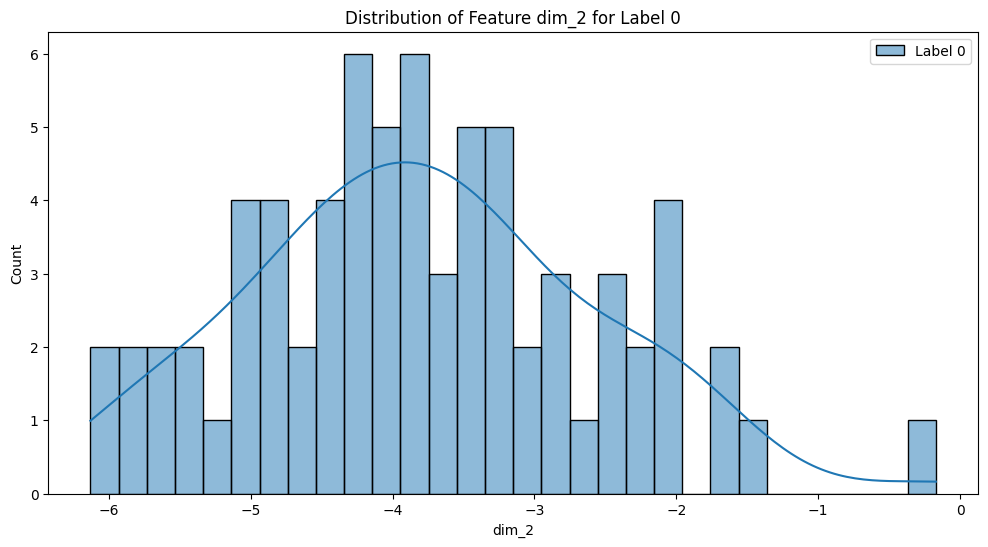

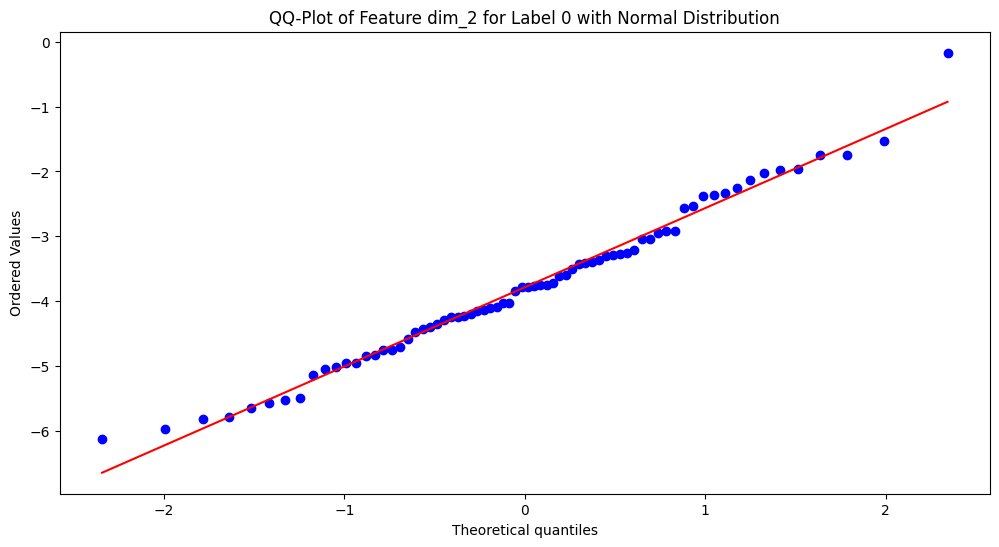

KS-test for Normal distribution (Feature dim_2, Label 0): Statistic = 0.05296224756871615, p-value = 0.9811973642218337
Data seems to follow a Normal distribution (Feature dim_2, Label 0).
Estimated parameters: Mean = -3.78501249021954, Std = 1.2049539699806446


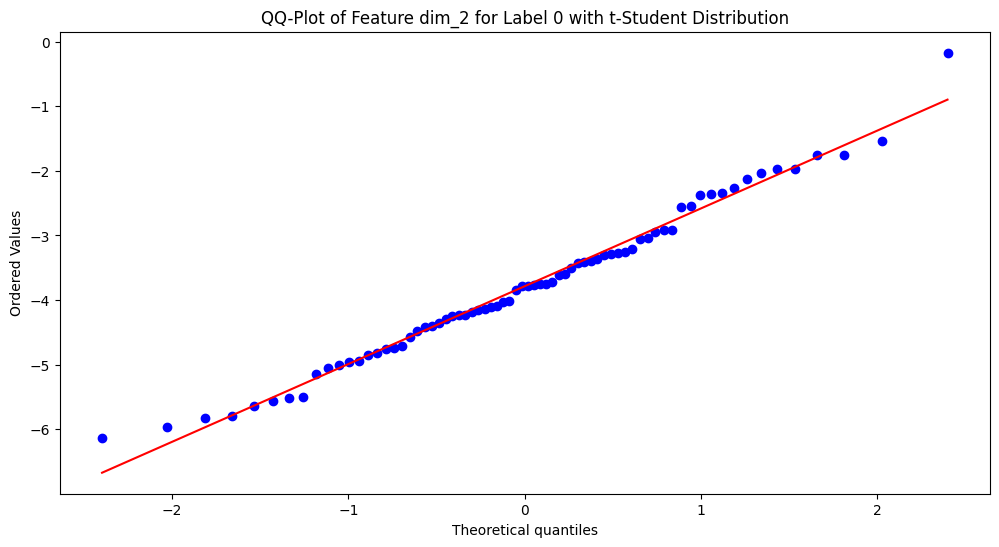

KS-test for t-Student distribution (Feature dim_2, Label 0): Statistic = 0.051772566530076336, p-value = 0.9850861739677995
Data seems to follow a t-Student distribution (Feature dim_2, Label 0).
Estimated parameters: Shape = 503991144.07014275, Location = -3.785011835827479, Scale = 1.1965574961831855


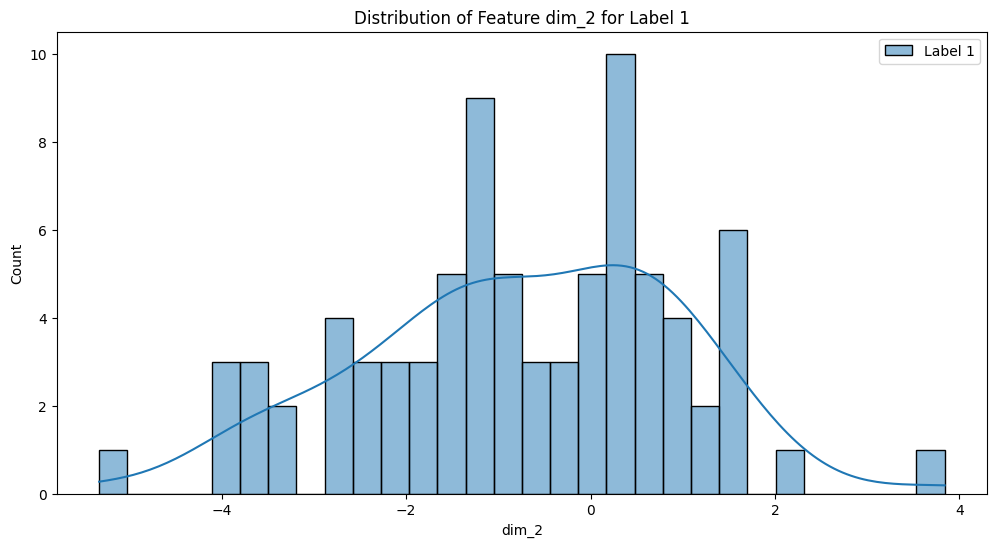

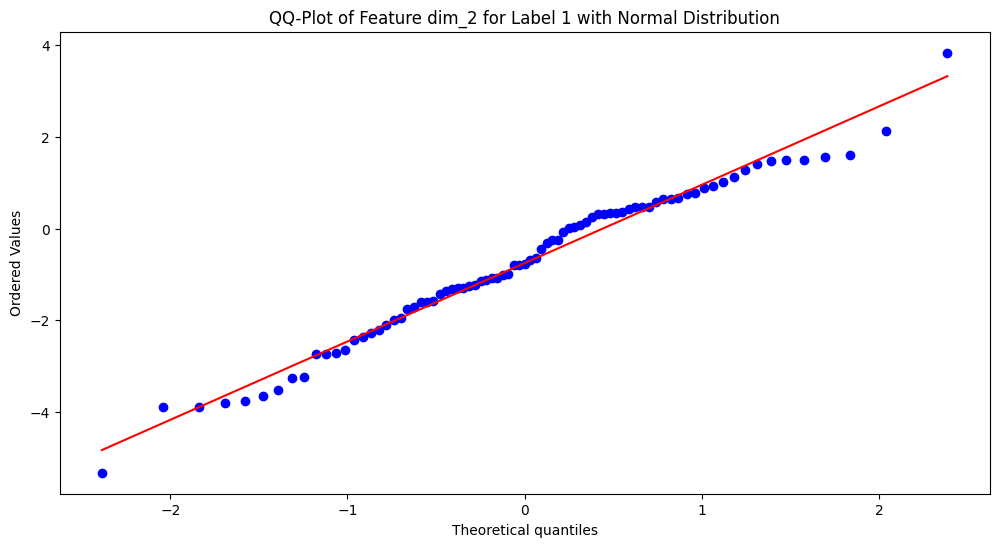

KS-test for Normal distribution (Feature dim_2, Label 1): Statistic = 0.08271097473369815, p-value = 0.6069130437477042
Data seems to follow a Normal distribution (Feature dim_2, Label 1).
Estimated parameters: Mean = -0.7532430911137734, Std = 1.6962860027793416


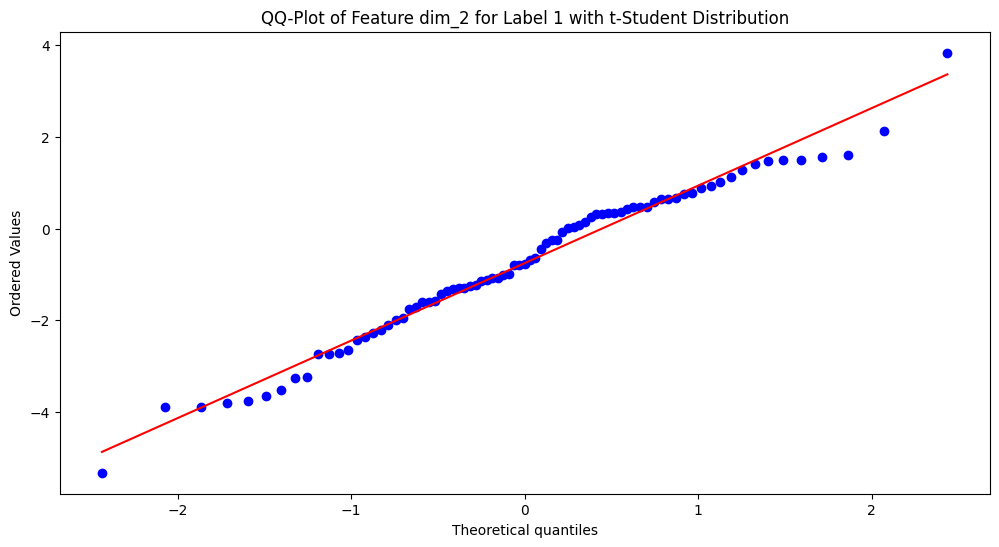

KS-test for t-Student distribution (Feature dim_2, Label 1): Statistic = 0.08399858167161356, p-value = 0.5875063314515516
Data seems to follow a t-Student distribution (Feature dim_2, Label 1).
Estimated parameters: Shape = 90693296571.91873, Location = -0.7532428169012304, Scale = 1.6857823252660067


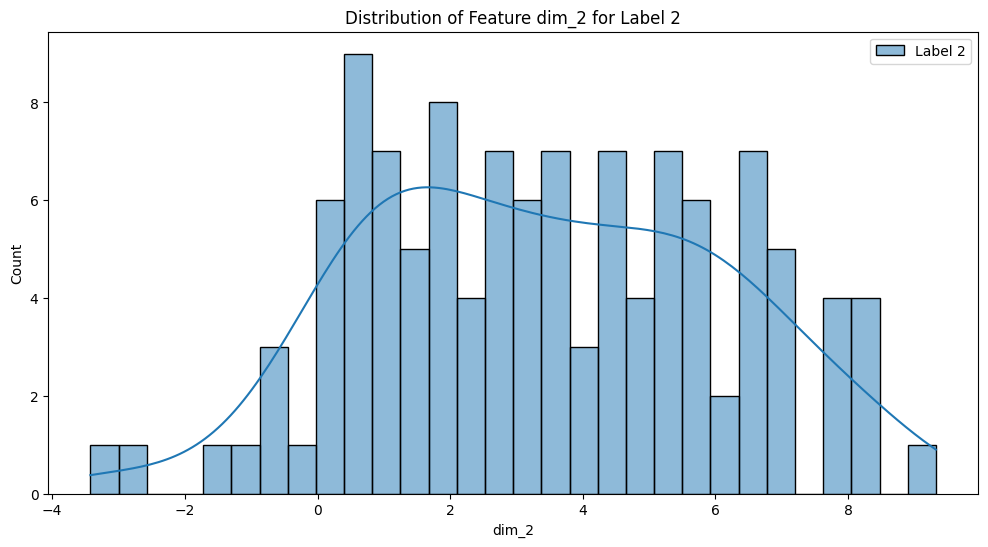

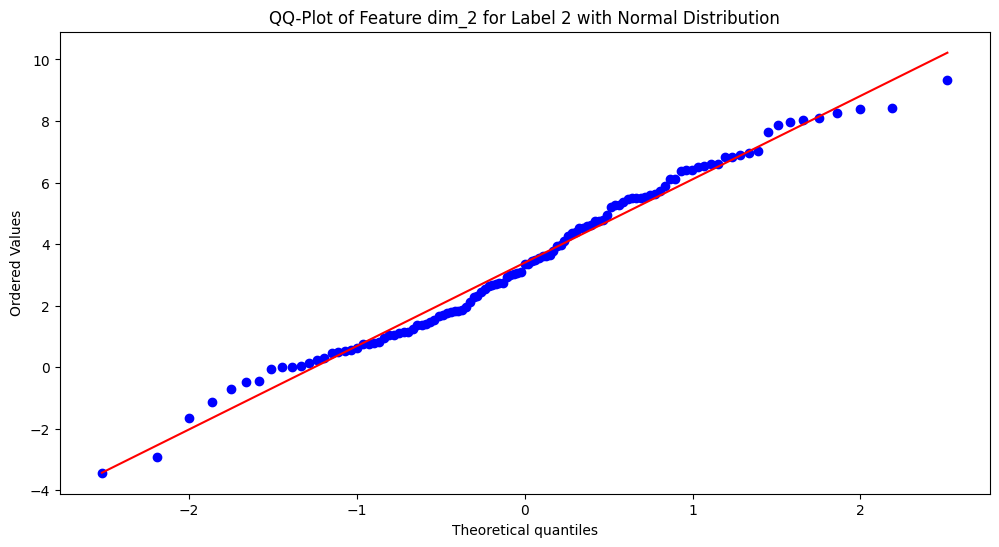

KS-test for Normal distribution (Feature dim_2, Label 2): Statistic = 0.07368451193400155, p-value = 0.5248803755227232
Data seems to follow a Normal distribution (Feature dim_2, Label 2).
Estimated parameters: Mean = 3.3960575142986755, Std = 2.692087561822481


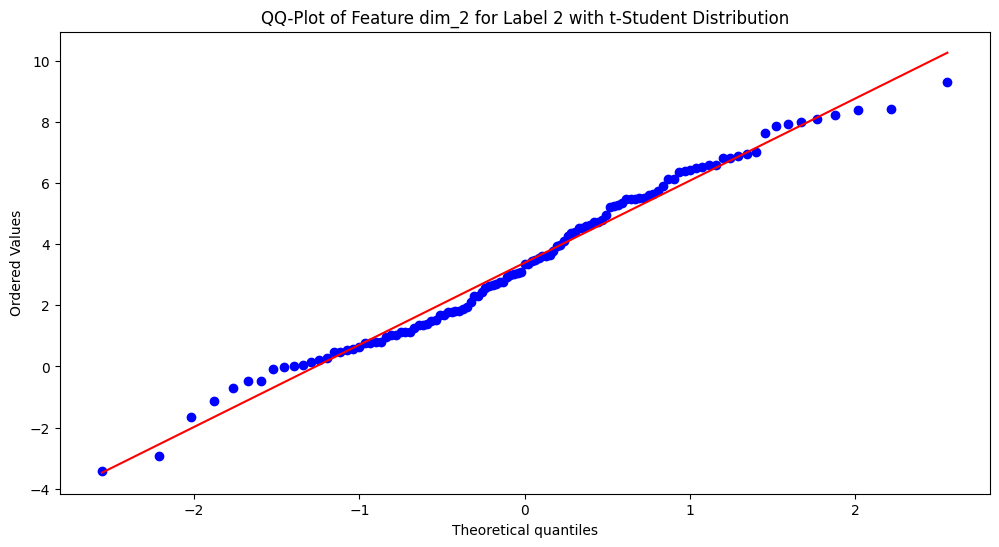

KS-test for t-Student distribution (Feature dim_2, Label 2): Statistic = 0.07451280732372995, p-value = 0.5105546664801632
Data seems to follow a t-Student distribution (Feature dim_2, Label 2).
Estimated parameters: Shape = 41261535048.558044, Location = 3.396059125971778, Scale = 2.6805578397052976
Analyzing dataset: Test


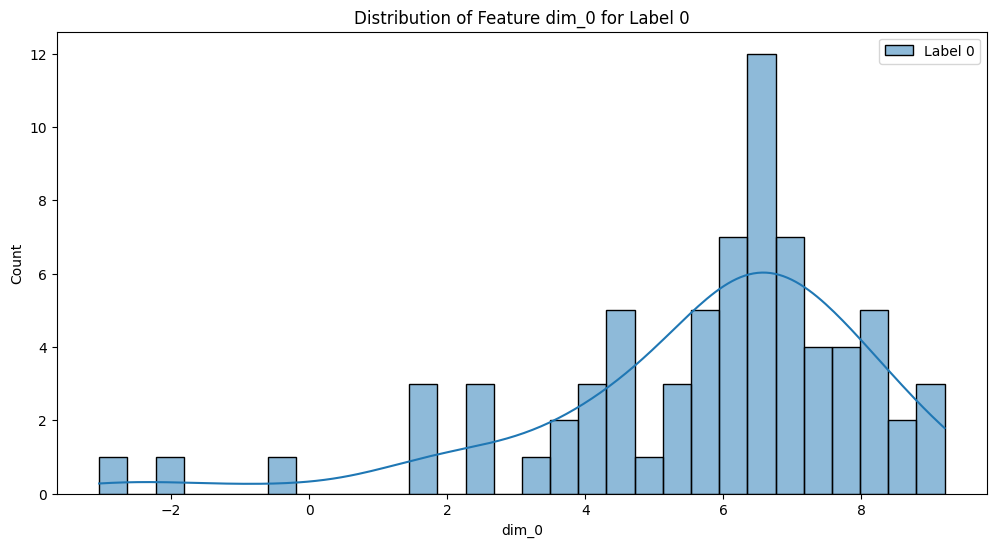

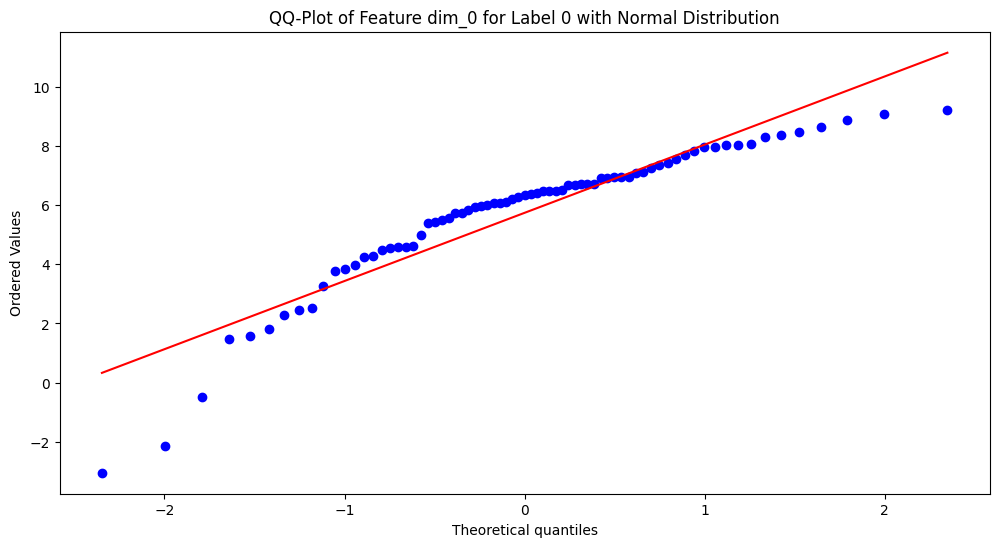

KS-test for Normal distribution (Feature dim_0, Label 0): Statistic = 0.15561323834911212, p-value = 0.052075500740049054
Data seems to follow a Normal distribution (Feature dim_0, Label 0).
Estimated parameters: Mean = 5.736197246264105, Std = 2.408364641305638


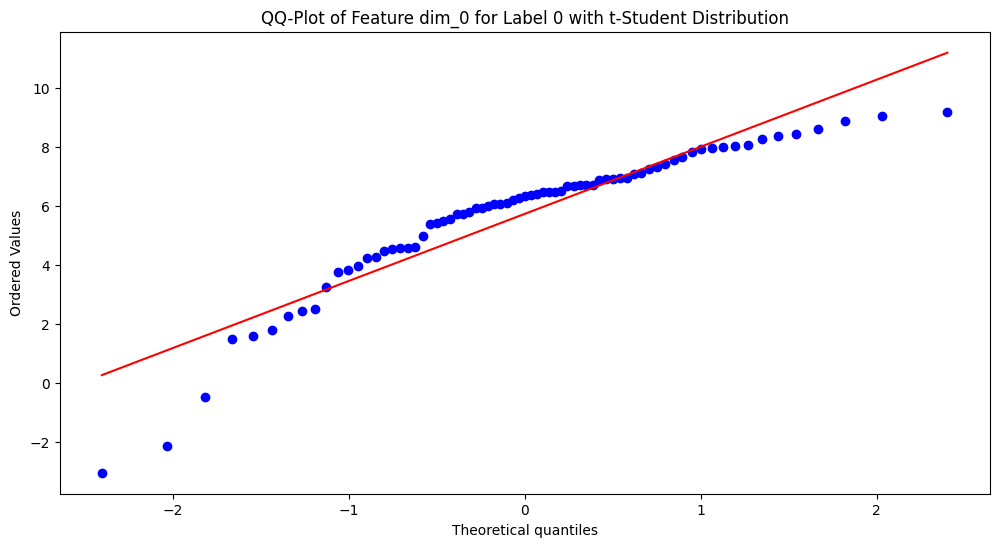

KS-test for t-Student distribution (Feature dim_0, Label 0): Statistic = 0.09702231872171313, p-value = 0.46874444372473867
Data seems to follow a t-Student distribution (Feature dim_0, Label 0).
Estimated parameters: Shape = 2.7063101781933163, Location = 6.259434711690584, Scale = 1.4837255895691301


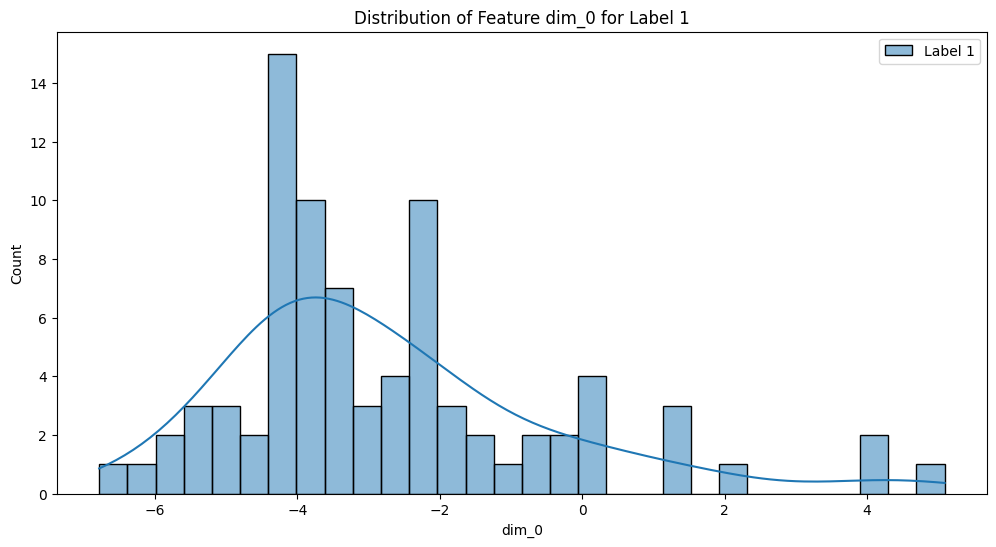

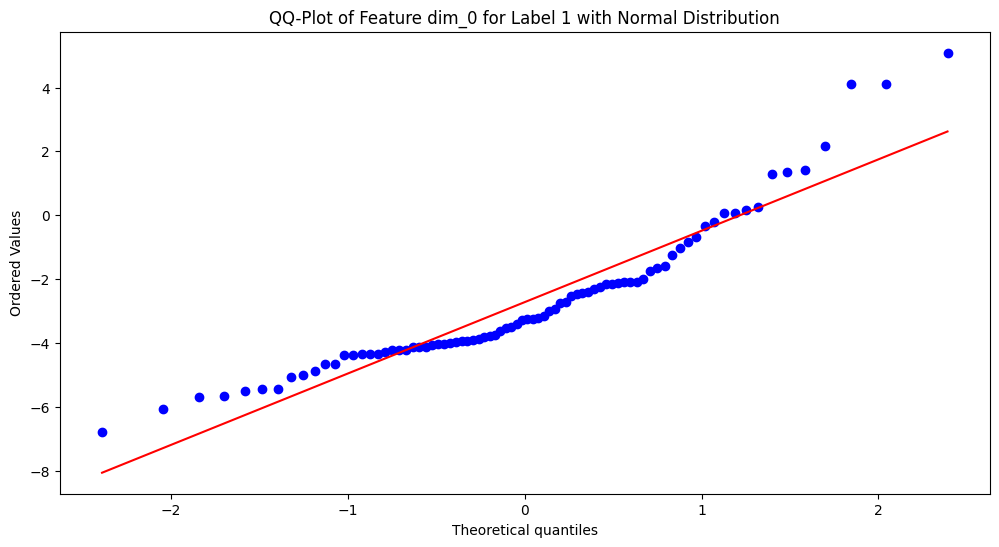

KS-test for Normal distribution (Feature dim_0, Label 1): Statistic = 0.13685689795500222, p-value = 0.0841836519854341
Data seems to follow a Normal distribution (Feature dim_0, Label 1).
Estimated parameters: Mean = -2.720866068107326, Std = 2.3139597649326764


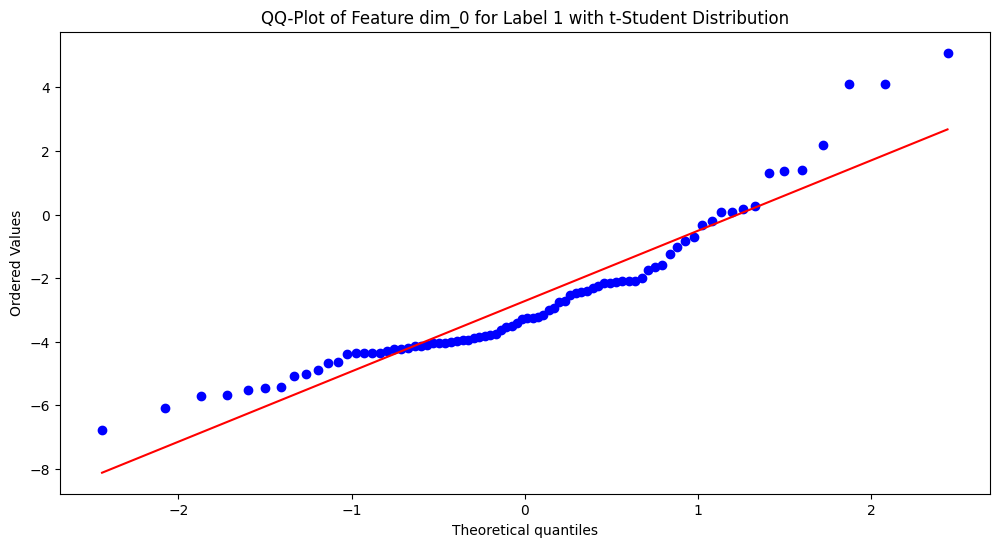

KS-test for t-Student distribution (Feature dim_0, Label 1): Statistic = 0.10189216571219578, p-value = 0.33905120043083575
Data seems to follow a t-Student distribution (Feature dim_0, Label 1).
Estimated parameters: Shape = 3.266778486863469, Location = -3.1717648830925267, Scale = 1.578610934114315


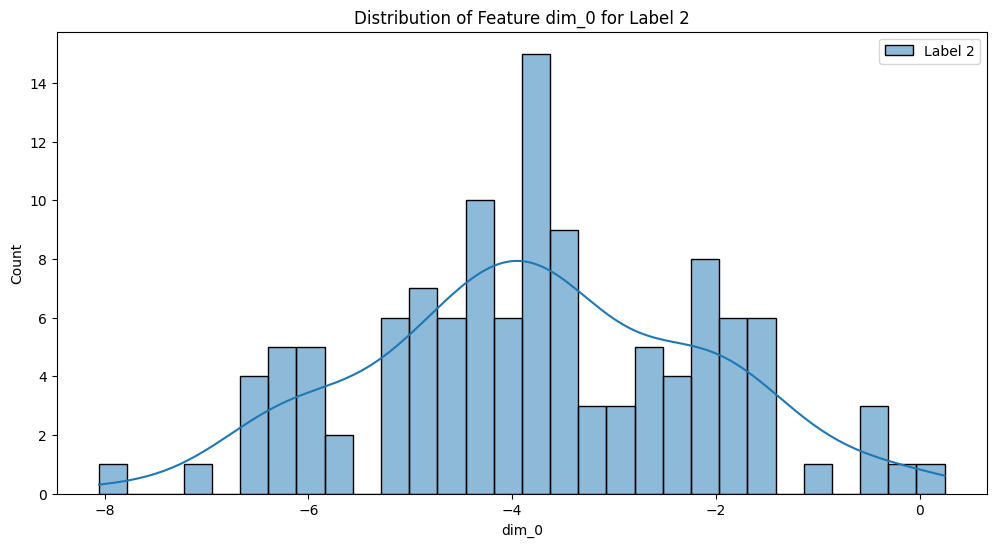

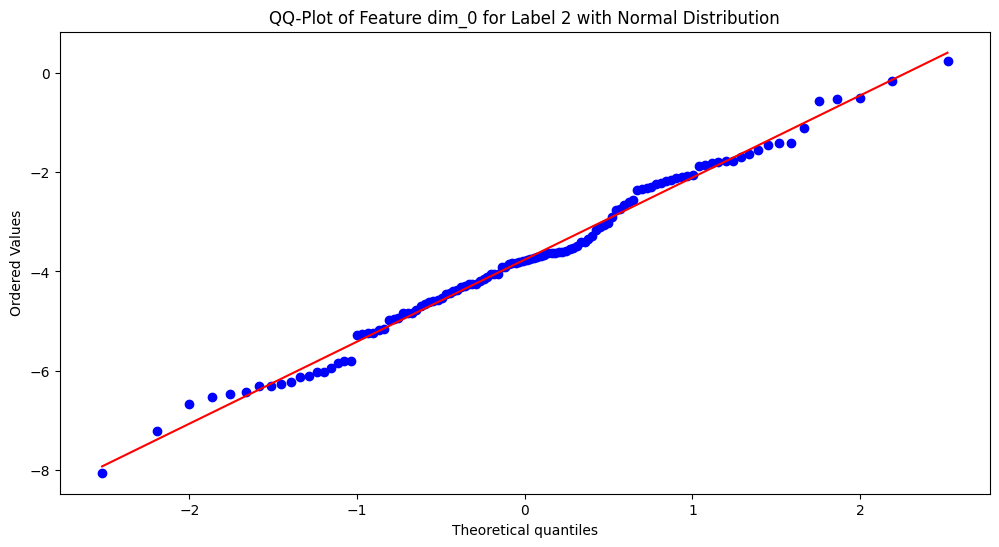

KS-test for Normal distribution (Feature dim_0, Label 2): Statistic = 0.06182580029326312, p-value = 0.734034941056028
Data seems to follow a Normal distribution (Feature dim_0, Label 2).
Estimated parameters: Mean = -3.7602166716577643, Std = 1.6372504496998608


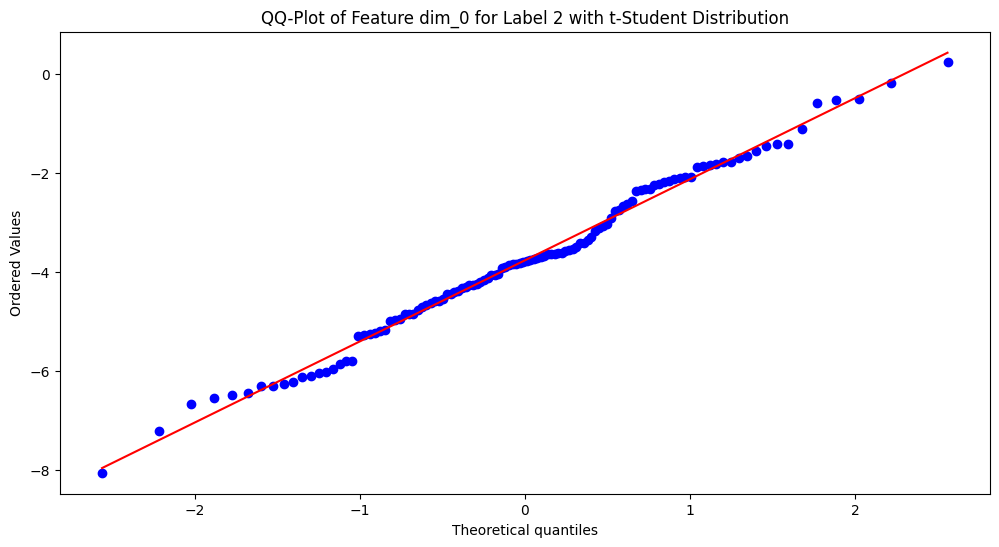

KS-test for t-Student distribution (Feature dim_0, Label 2): Statistic = 0.06158498568692117, p-value = 0.7383346062795878
Data seems to follow a t-Student distribution (Feature dim_0, Label 2).
Estimated parameters: Shape = 3365026192.180588, Location = -3.760217620162704, Scale = 1.6302998027761166


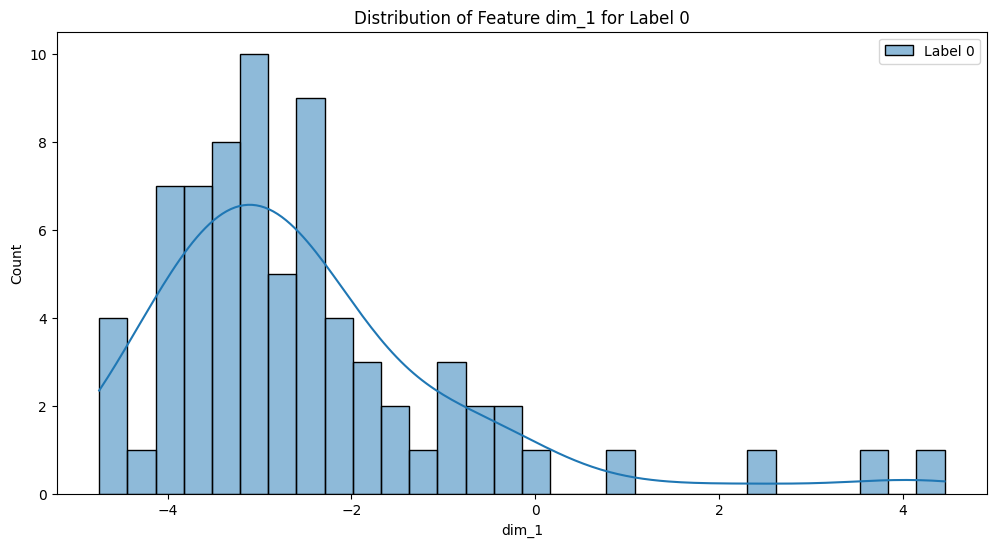

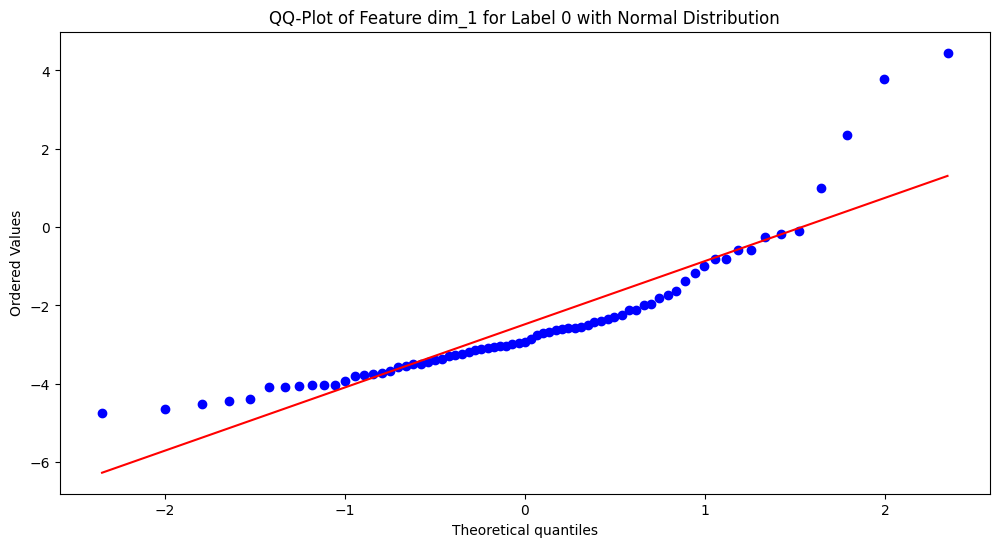

KS-test for Normal distribution (Feature dim_1, Label 0): Statistic = 0.1601933224110329, p-value = 0.04195829693701949
Data does not follow a Normal distribution (Feature dim_1, Label 0).


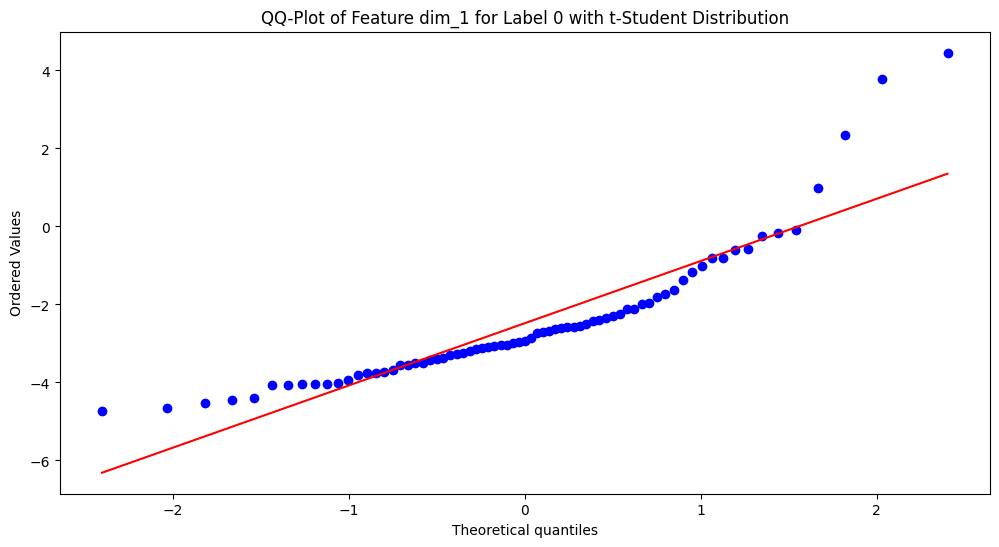

KS-test for t-Student distribution (Feature dim_1, Label 0): Statistic = 0.09402894661855088, p-value = 0.5086374637180151
Data seems to follow a t-Student distribution (Feature dim_1, Label 0).
Estimated parameters: Shape = 2.373664730306805, Location = -2.9033381475453948, Scale = 0.949216692135652


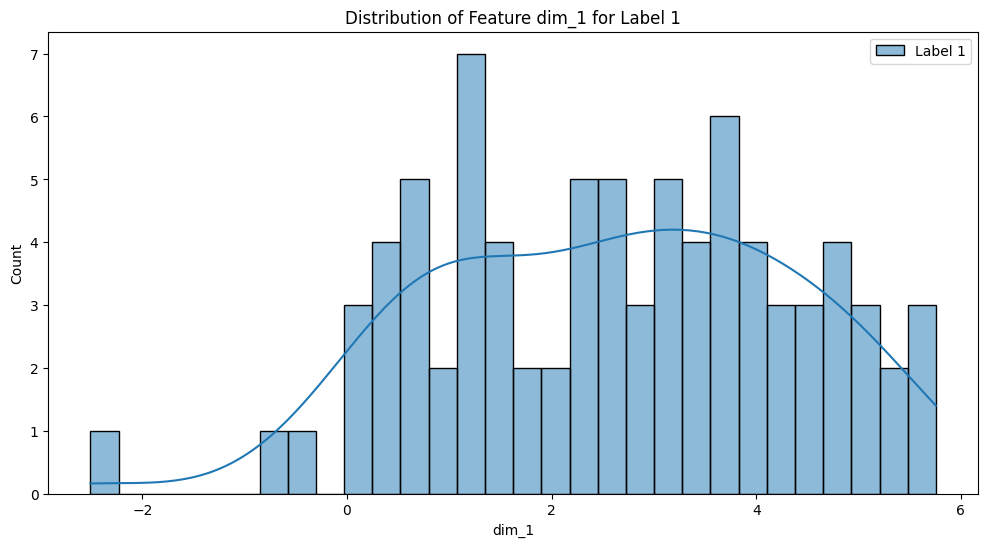

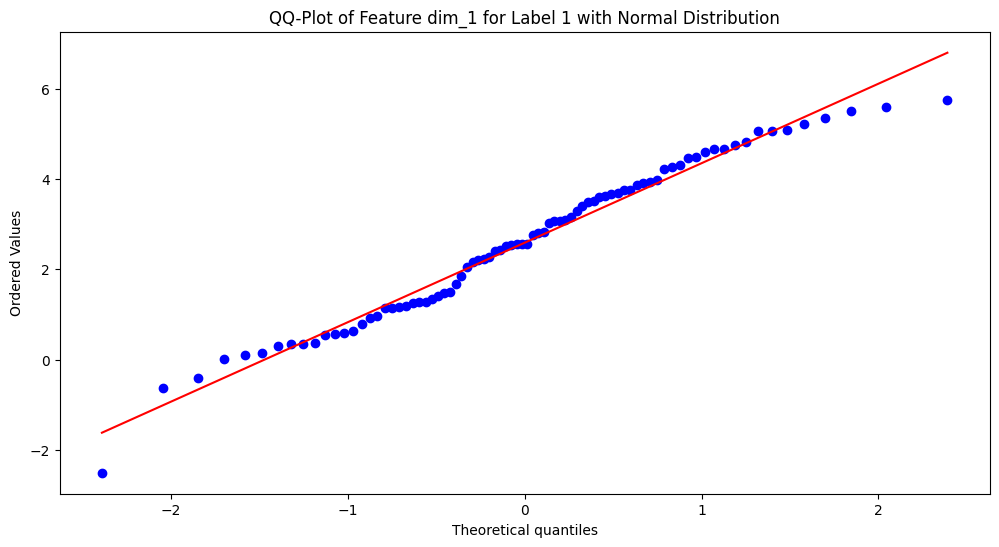

KS-test for Normal distribution (Feature dim_1, Label 1): Statistic = 0.07382843968839431, p-value = 0.7345409616830507
Data seems to follow a Normal distribution (Feature dim_1, Label 1).
Estimated parameters: Mean = 2.587313710643751, Std = 1.7472334959293192


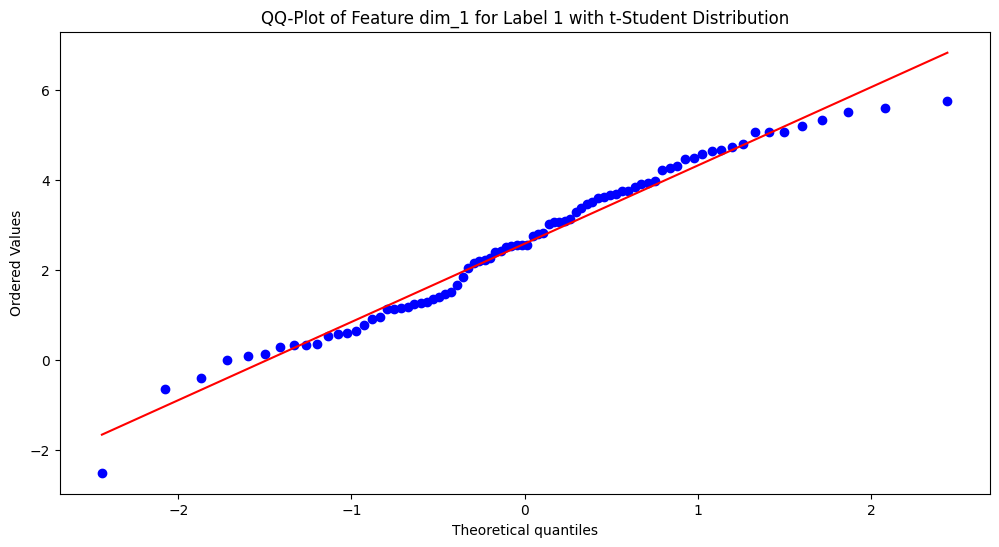

KS-test for t-Student distribution (Feature dim_1, Label 1): Statistic = 0.0750828078450973, p-value = 0.7157257160718629
Data seems to follow a t-Student distribution (Feature dim_1, Label 1).
Estimated parameters: Shape = 15403937053.492672, Location = 2.587312942262792, Scale = 1.7365465408418221


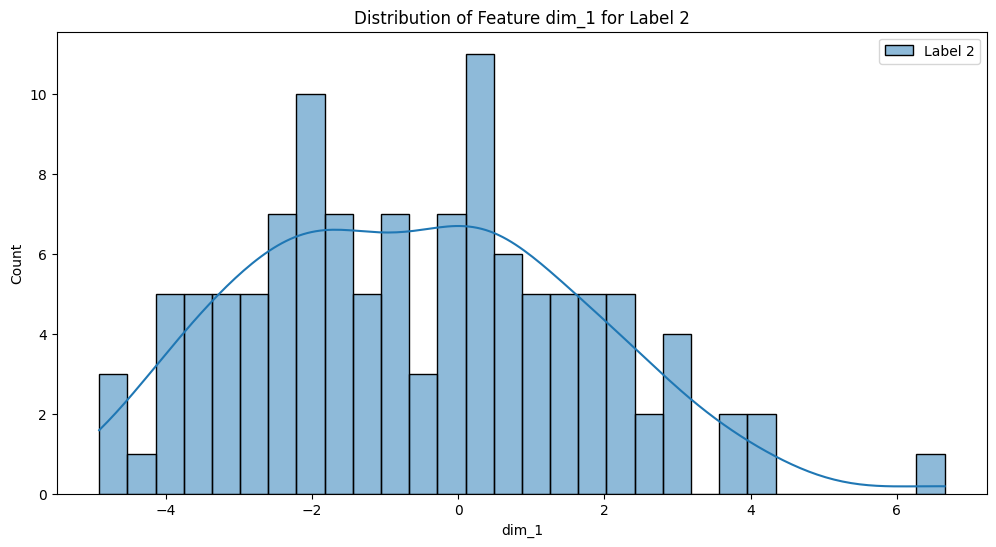

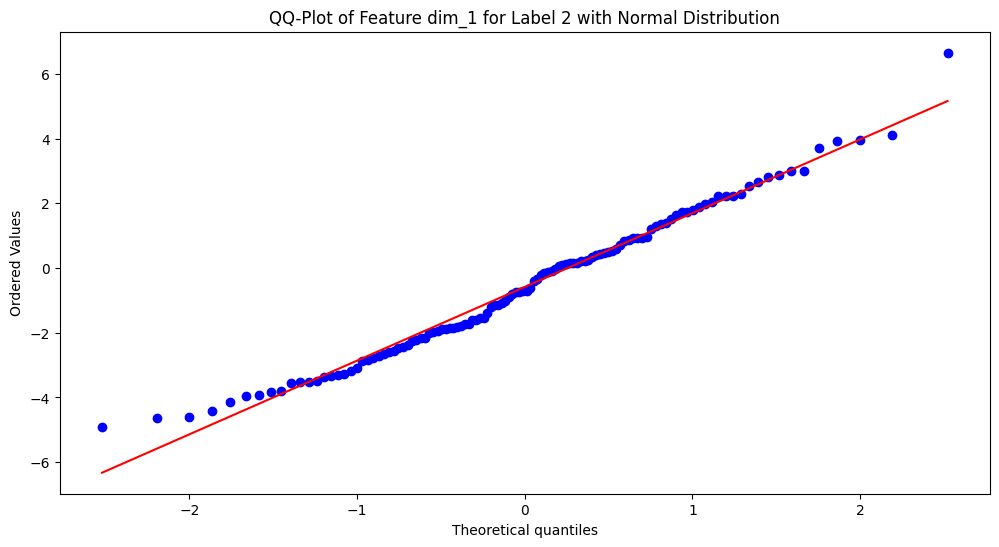

KS-test for Normal distribution (Feature dim_1, Label 2): Statistic = 0.0700399117747621, p-value = 0.5842979303869869
Data seems to follow a Normal distribution (Feature dim_1, Label 2).
Estimated parameters: Mean = -0.5815255111556942, Std = 2.265862075485725


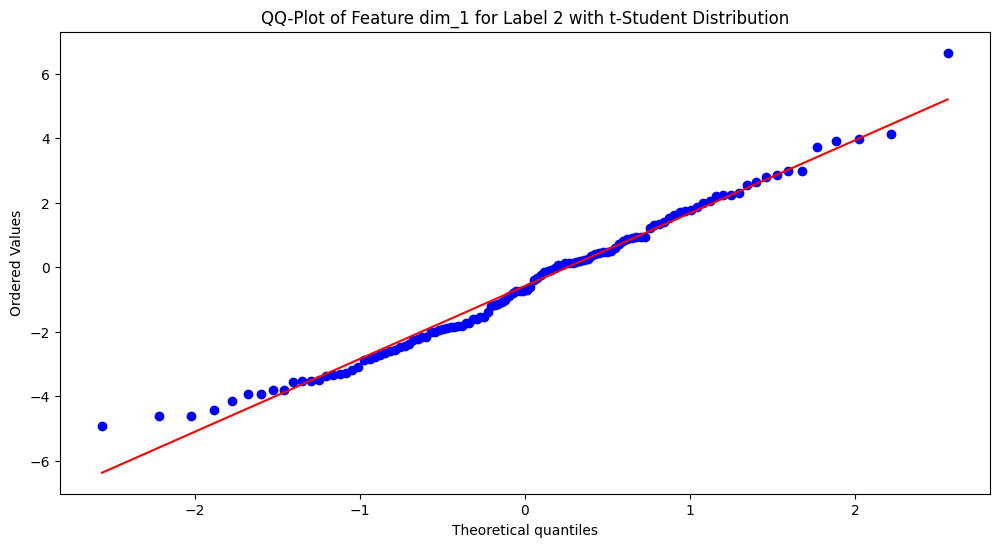

KS-test for t-Student distribution (Feature dim_1, Label 2): Statistic = 0.07069560212339654, p-value = 0.5724679530112474
Data seems to follow a t-Student distribution (Feature dim_1, Label 2).
Estimated parameters: Shape = 334282705002.7353, Location = -0.5815255978500553, Scale = 2.2562407865093865


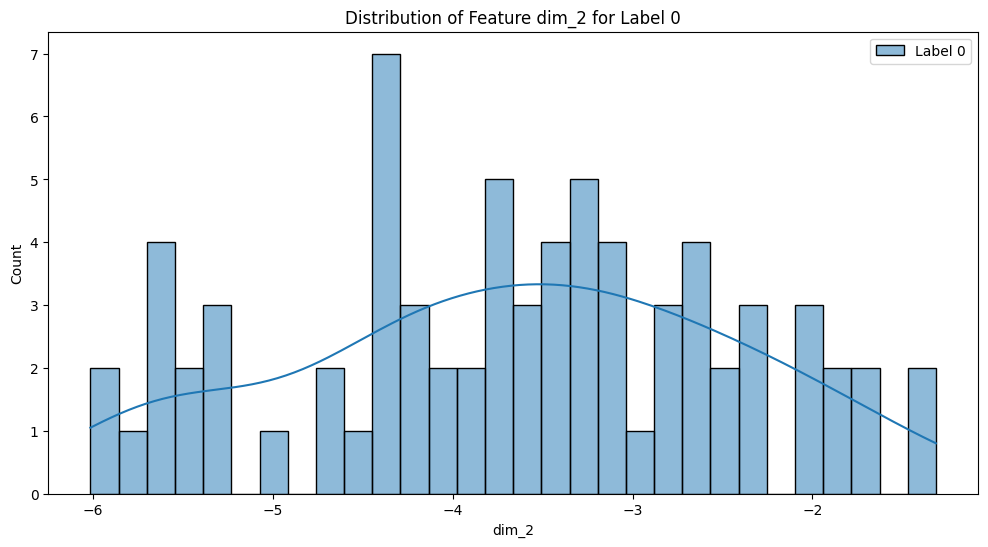

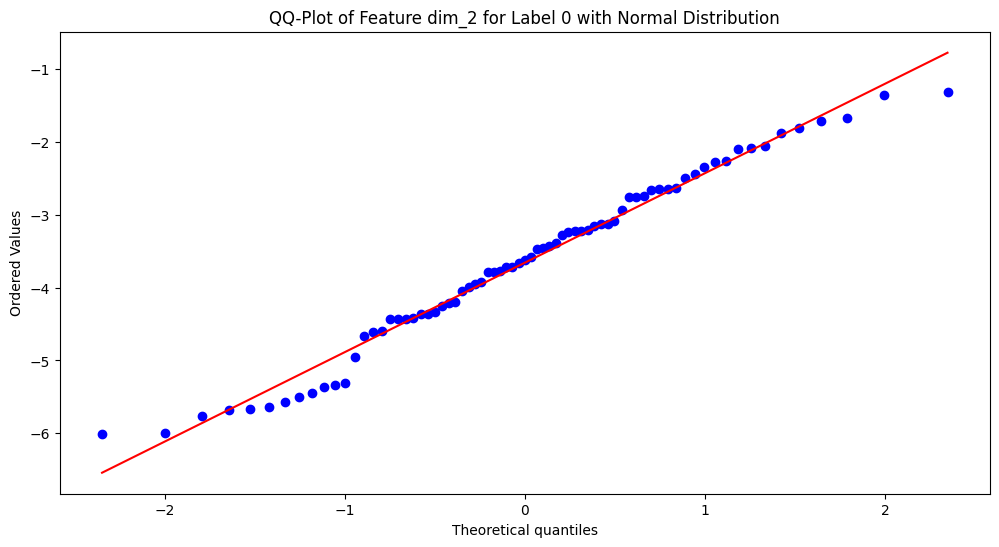

KS-test for Normal distribution (Feature dim_2, Label 0): Statistic = 0.07768400016382221, p-value = 0.7408490016888045
Data seems to follow a Normal distribution (Feature dim_2, Label 0).
Estimated parameters: Mean = -3.65769003025473, Std = 1.2157804121158824


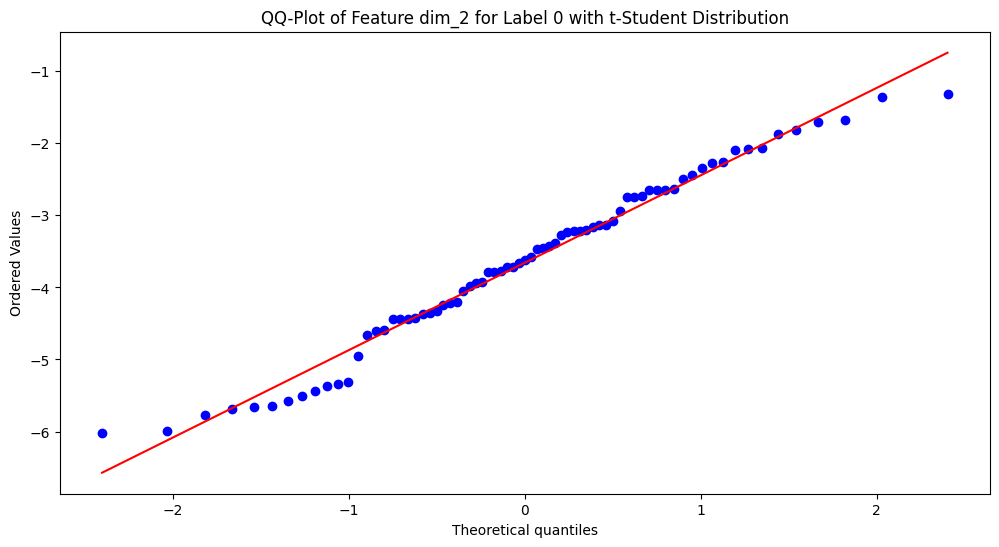

KS-test for t-Student distribution (Feature dim_2, Label 0): Statistic = 0.07916266221015796, p-value = 0.7199846597827891
Data seems to follow a t-Student distribution (Feature dim_2, Label 0).
Estimated parameters: Shape = 173822490.0066756, Location = -3.6576742409347904, Scale = 1.2074344668413408


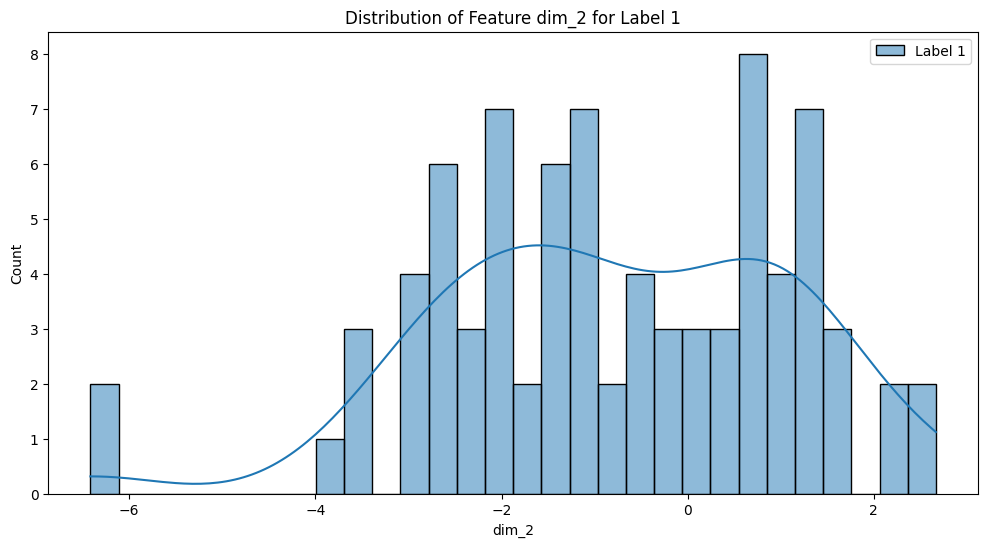

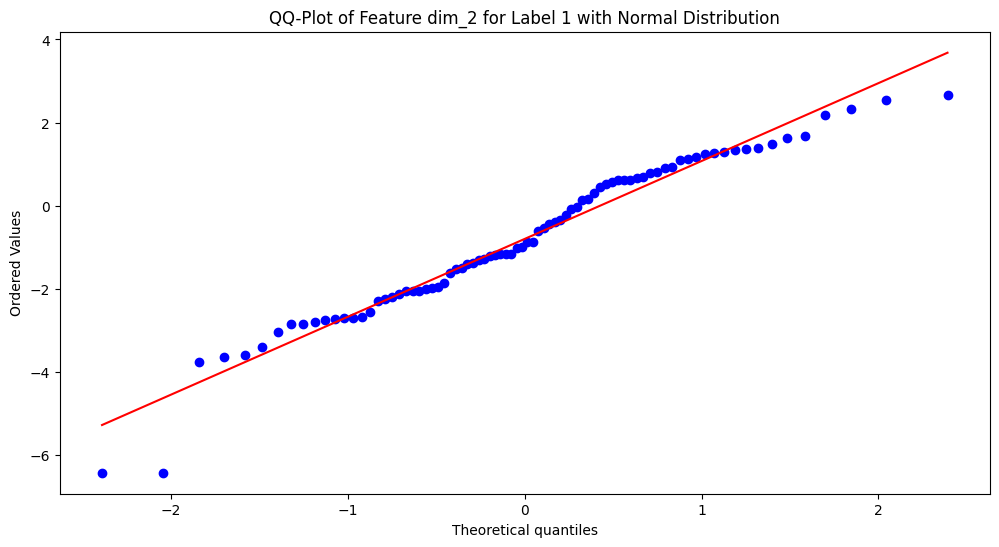

KS-test for Normal distribution (Feature dim_2, Label 1): Statistic = 0.09050867851305477, p-value = 0.4847630316731064
Data seems to follow a Normal distribution (Feature dim_2, Label 1).
Estimated parameters: Mean = -0.7943976851316487, Std = 1.8719528047430898


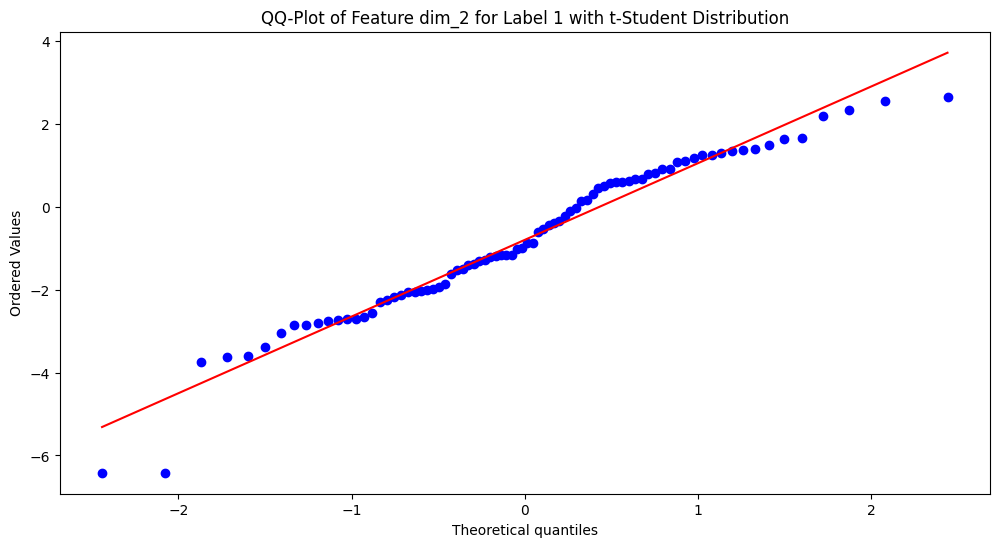

KS-test for t-Student distribution (Feature dim_2, Label 1): Statistic = 0.09231869508158419, p-value = 0.45961882098541007
Data seems to follow a t-Student distribution (Feature dim_2, Label 1).
Estimated parameters: Shape = 37.12330898295828, Location = -0.7747050703274365, Scale = 1.8092026389490554


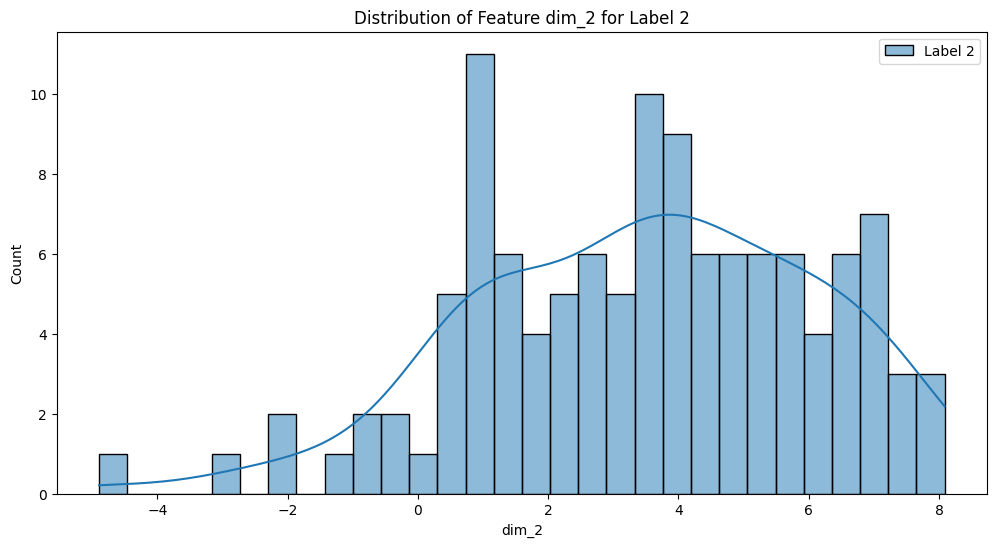

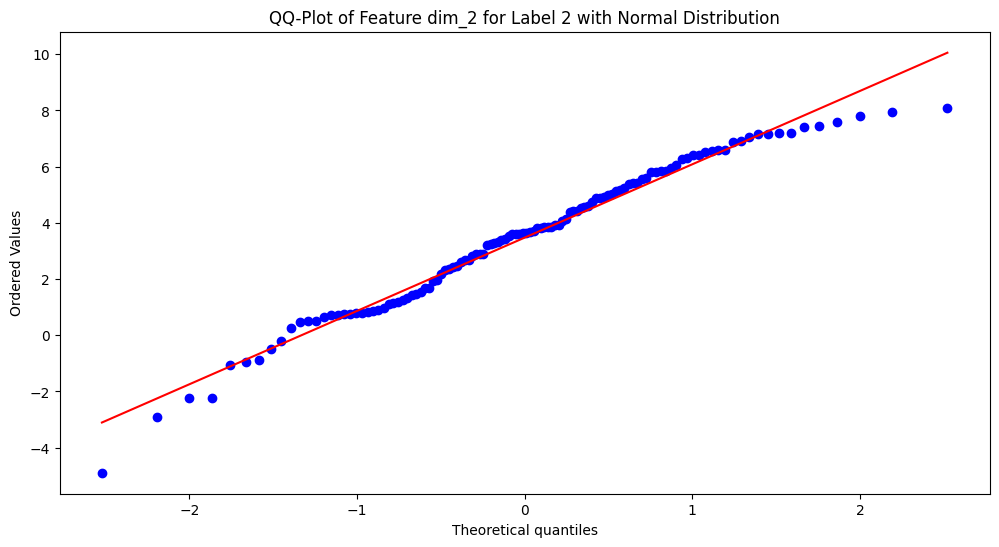

KS-test for Normal distribution (Feature dim_2, Label 2): Statistic = 0.053725408751418346, p-value = 0.8668315648207052
Data seems to follow a Normal distribution (Feature dim_2, Label 2).
Estimated parameters: Mean = 3.4739575476969704, Std = 2.6052759363779607


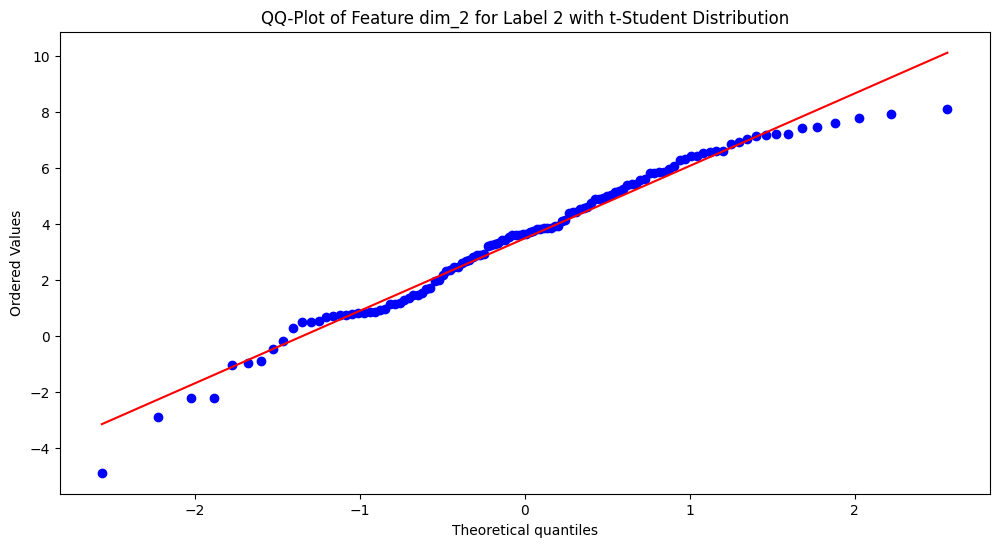

KS-test for t-Student distribution (Feature dim_2, Label 2): Statistic = 0.053558385484337334, p-value = 0.8692096936253415
Data seems to follow a t-Student distribution (Feature dim_2, Label 2).
Estimated parameters: Shape = 46728624.97689636, Location = 3.4739496782881805, Scale = 2.594189528035324


In [6]:
# Phân tích cho từng dataset, feature và label
datasets = {'Train': train_df, 'Valid': valid_df, 'Test': test_df}

for dataset_name, dataset in datasets.items():
    print(f'Analyzing dataset: {dataset_name}')
    for feature in features:
        for label in labels:
            data = dataset[dataset['label'] == label]
            analyze_distribution(data, feature, label)